# Dataset 1: Synthetic Circle


## Introduction


The **Synthetic Circle dataset** is an artificial 2D dataset containing **10,000 points** grouped into **100 circular clusters**, with each cluster containing **100 points**.  
It includes two real-valued features, x and y, representing the coordinates of each point, and a class label identifying which circle each point belongs to. The dataset is designed to test clustering algorithms.  

Here, **“conflicting”** refers to the **mismatch between the circular (non-convex) structure of the data and the assumptions of traditional clustering methods** like K-Means, which expect clusters to be roughly spherical and convex. Thus, while the clusters are clearly defined visually, algorithms relying solely on Euclidean distance may struggle to capture their true shape.

We shall use **K-means** and **DBSCAN** for clustering and compare the results using the **Davies–Bouldin index**.


## Exploratory Data Analysis (EDA)

### Reading and Data Preprocessing

In this section, we will take a look at the structure of the data.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("circles.txt")

In [8]:
df.head()

,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


In [9]:
df.tail()

,x,y,class
9995,-4.85337,138.79801,7
9996,135.75636,77.35585,74
9997,81.18879,184.85662,49
9998,116.47674,116.45223,66
9999,120.84808,75.07245,64


In [10]:
df.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


In [11]:
df.shape

(10000, 3)

In [12]:
df.isnull().sum()

x        0
y        0
class    0
dtype: int64

In [13]:
df.dtypes

x        float64
y        float64
class      int64
dtype: object

In [14]:
df.duplicated().sum()

0

So upon looking at the data, we see that there are no missing values, and all values are of the float type. Additionally, there are no duplicates in the dataset. We will now move on to the next part - Data Visualization.

### Data Visualization

In this section, we aim to visually explore the data.

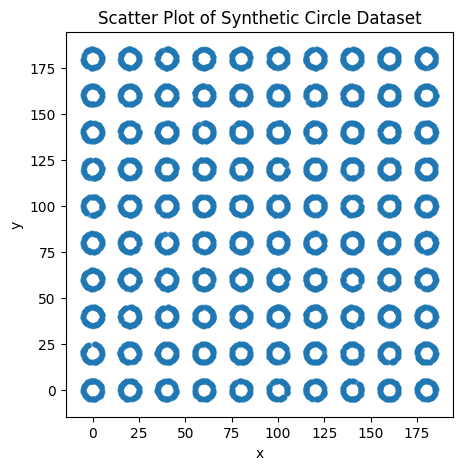

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(df["x"], df["y"], s = 10, alpha = 0.5)
plt.title("Scatter Plot of Synthetic Circle Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

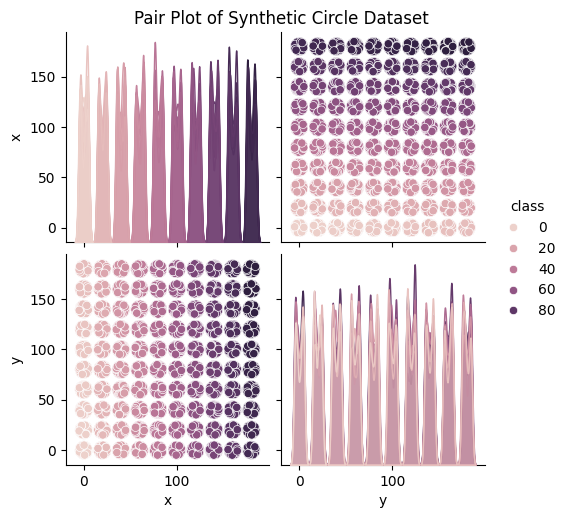

In [16]:
pairplot = sns.pairplot(df, hue='class')
pairplot.fig.suptitle("Pair Plot of Synthetic Circle Dataset", y=1.02)
plt.show()

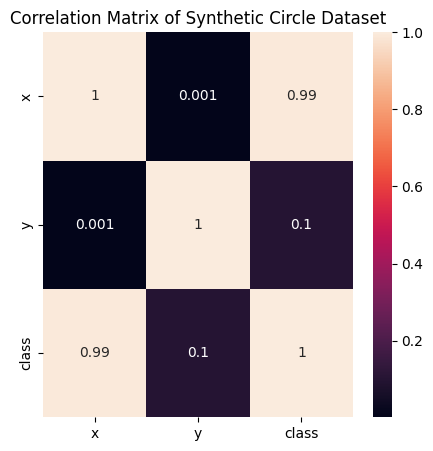

In [17]:
number_df = df.select_dtypes(include = [np.number])
correlation_matrix = number_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix of Synthetic Circle Dataset")
plt.show()

#### Inferences from the plots:

1) The scatter plot of the dataset reveals a highly structured and symmetric spatial pattern. Each of the 100 clusters forms a distinct circular ring arranged in a uniform grid. This confirms that the data is clean, evenly distributed, and perfectly separated, with no missing or overlapping points. 

2) The pair plot shows the pairwise relationships between x, y, and class.  Both the x and y features exhibit periodic and repeating distributions, which is consistent with the circular arrangement of the points.  

3) Finally, the correlation heatmap shows that x and y are nearly uncorrelated, which means there is no linear dependency between the two coordinates.  


## Clustering Methods

### K-Means Implementation

K-Means partitions data into *k* clusters by minimizing the distance between points and their cluster centroids.  
It iteratively:
1. Initializes *k* random centroids.  
2. Assigns each point to the nearest centroid.  
3. Updates each centroid as the mean of its assigned points.  
The process repeats until centroids stop changing (convergence).

**Hyperparameters:**
1) The number of clusters k = 100 was chosen since the dataset is known to contain 100 distinct circular clusters.
2) The distance metric used is the Euclidean distance, which measures the straight-line distance between points and centroids.
3) Convergence threshold epsilon = 1e−4 ensures the algorithm stops only when centroid movement is minimal, and a maximum iteration limit (max_iter = 500) prevents infinite loops.  


In [18]:
import numpy as np
import random

class KMeansClustering:
    def __init__(self, k, epsilon = 1e-9, max_iter = 2000):
        self.k = k
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.centroids = []
        self.clusters = []

    def cluster_points(self, points):
        """ 
        Measure distance to each centroid and assign points to the nearest cluster 
        """
        self.clusters = []
        for i in range(self.k):
            self.clusters.append([])
        for point in points:
            pt_distances = [np.linalg.norm(point - self.centroids[i], axis=0) for i in range(self.k)]
            closest_cluster_index = int(np.argmin(pt_distances))
            self.clusters[closest_cluster_index].append(point)

    def recalculate_centroid(self):
        """
        recalculate centroid to be the mean of all of its cluster's points
        """
        for i in range(self.k):
            if len(self.clusters[i]) > 0:
                self.centroids[i] = np.mean(self.clusters[i], axis=0)
            else:
                self.centroids[i] = self.centroids[i]

    def convergence(self, old_centroids):
        """
        Checks convergence
        """
        all_distances = np.linalg.norm(np.array(old_centroids) - np.array(self.centroids), axis=1)
        max_dist = all_distances.max()
        return max_dist < self.epsilon

    def fit(self, points):
        """
        training k-means model
        """
        points = np.array(points)
        self.centroids = random.sample(list(points), self.k)
        for i in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self.cluster_points(points)
            self.recalculate_centroid()
            if self.convergence(old_centroids):
                print(f"Converged at {i+1} iteration")
                break
        return self.clusters


In [44]:
X = df[["x", "y"]].to_numpy()

kmeans = KMeansClustering(k=100, epsilon = 1e-4, max_iter = 500)
clusters = kmeans.fit(X)

converged at iteration 23


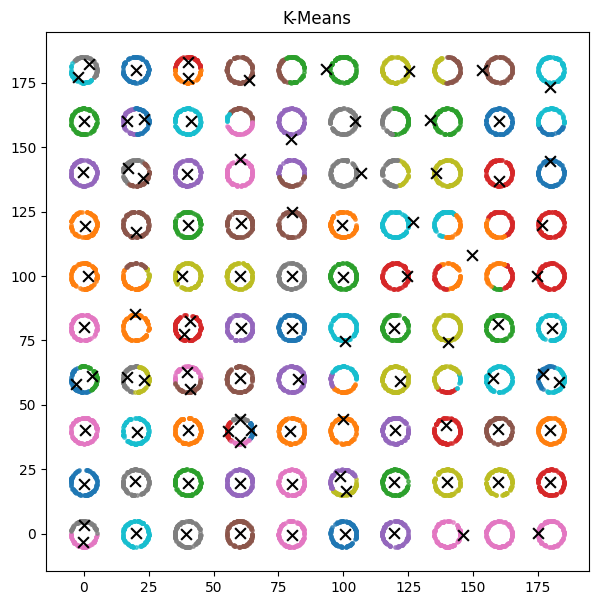

In [ ]:
plt.figure(figsize = (7, 7))
for cluster in clusters:
    cluster = np.array(cluster)
    if len(cluster):
        plt.scatter(cluster[:,0], cluster[:,-1], s =6, alpha = 0.7)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=60, marker='x')
plt.title('K-Means')
plt.show()

Now that we have our clustering, let us evaluate this with Davies–Bouldin Index.

In [ ]:
centroids = np.array(kmeans.centroids)

def assign_labels_from_centroids(X, centroids):
    d = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (n,k)
    return np.argmin(d, axis=1)

labels = assign_labels_from_centroids(X, centroids)


In [ ]:
def davies_bouldin_index(X, labels, centroids, eps=1e-12):
    K = len(centroids)
    S = np.zeros(K, dtype=float)
    for k in range(K):
        pts = X[labels == k]
        if len(pts) == 0:
            S[k] = 0.0
        else:
            S[k] = np.mean(np.linalg.norm(pts - centroids[k], axis=1))

    # centroid distances M_{ij}
    M = np.linalg.norm(centroids[:, None, :] - centroids[None, :, :], axis=2) + eps

    # R_{ij} = (S_i + S_j) / M_{ij}; for i!=j
    R = (S[:, None] + S[None, :]) / M
    np.fill_diagonal(R, -np.inf)  # ignore i=j

    D = np.max(R, axis=1)
    return float(np.mean(D))


In [ ]:
dbi = davies_bouldin_index(X, labels, centroids)
print("DBI:", round(dbi, 6))

DBI: 0.718517


### DBSCAN Implementation

DBSCAN clusters points based on density.  

**Algorithm :**
1) For each point, find all neighboring points within distance epsilon (eps).  
2) Mark points with at least MinPts neighbors as core points.  
3) For each unvisited core point, form a new cluster and recursively include all points density-connected to it.  
4) Points that are not part of any cluster are labeled as noise.

**Hyperparameters:** 
1) eps: neighborhood radius  = 2
2) MinPts: minimum neighbors to form a cluster = 5


In [ ]:
import numpy as np
from collections import deque

class DBSCAN:
    def __init__(self, eps, min_pts):
        self.eps = float(eps)
        self.min_pts = int(min_pts)
        self.core_sample_mask_ = None
        self.n_clusters_ = 0
        self.labels_ = None
        
    def _region_query(self, points, i):
        neighbours = []
        for j in range(len(points)):
            if np.linalg.norm(points[i] - points[j]) <= self.eps:
                neighbours.append(j)
        return np.array(neighbours)

    def fit(self, points):
        points = np.array(points)
        N = len(points)
        self.labels_ = -np.ones(N, dtype=int)
        visited = np.zeros(N, dtype=bool)
        self.core_sample_mask_ = np.zeros(N, dtype=bool)

        neighborhoods = [self._region_query(points, i) for i in range(N)]

        for i in range(N):
            if len(neighborhoods[i]) >= self.min_pts:
                self.core_sample_mask_[i] = True

        cluster_id = 0
        for i in range(N):
            if visited[i]:
                continue
            visited[i] = True

            if not self.core_sample_mask_[i]:
                continue

            self.labels_[i] = cluster_id
            queue = deque([i])

            while queue:
                j = queue.popleft()
                if not self.core_sample_mask_[j]:
                    continue
                for k in neighborhoods[j]:
                    if not visited[k]:
                        visited[k] = True
                        if self.core_sample_mask_[k]:
                            queue.append(k)
                    if self.labels_[k] == -1:
                        self.labels_[k] = cluster_id
            cluster_id += 1

        self.n_clusters_ = cluster_id
        return self

    def fit_predict(self, X):
        return self.fit(X).labels_


In [ ]:
X = df[["x", "y"]].to_numpy()

In [ ]:
db = DBSCAN(eps=2, min_pts=5)
labels = db.fit_predict(X)

print("Clusters:", db.n_clusters_)
print("Noise points:", (labels == -1).sum())
print("Per-cluster counts:", {c:int((labels==c).sum()) for c in range(db.n_clusters_)})

Clusters: 100
Noise points: 0
Per-cluster counts: {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100, 10: 100, 11: 100, 12: 100, 13: 100, 14: 100, 15: 100, 16: 100, 17: 100, 18: 100, 19: 100, 20: 100, 21: 100, 22: 100, 23: 100, 24: 100, 25: 100, 26: 100, 27: 100, 28: 100, 29: 100, 30: 100, 31: 100, 32: 100, 33: 100, 34: 100, 35: 100, 36: 100, 37: 100, 38: 100, 39: 100, 40: 100, 41: 100, 42: 100, 43: 100, 44: 100, 45: 100, 46: 100, 47: 100, 48: 100, 49: 100, 50: 100, 51: 100, 52: 100, 53: 100, 54: 100, 55: 100, 56: 100, 57: 100, 58: 100, 59: 100, 60: 100, 61: 100, 62: 100, 63: 100, 64: 100, 65: 100, 66: 100, 67: 100, 68: 100, 69: 100, 70: 100, 71: 100, 72: 100, 73: 100, 74: 100, 75: 100, 76: 100, 77: 100, 78: 100, 79: 100, 80: 100, 81: 100, 82: 100, 83: 100, 84: 100, 85: 100, 86: 100, 87: 100, 88: 100, 89: 100, 90: 100, 91: 100, 92: 100, 93: 100, 94: 100, 95: 100, 96: 100, 97: 100, 98: 100, 99: 100}


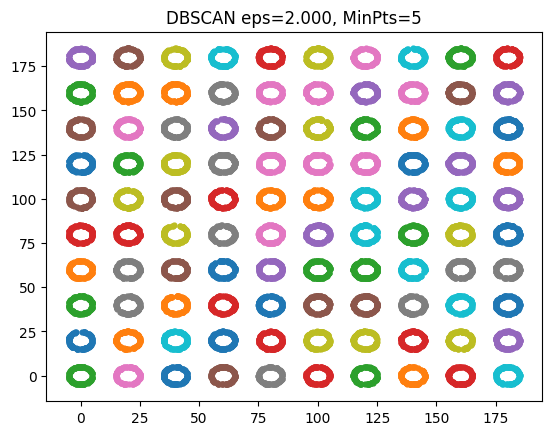

In [ ]:
eps = 2.0
min_pts = 5
if X.shape[1] == 2:
    unique = sorted(set(labels))
    for lab in unique:
        mask = labels == lab
        plt.scatter(X[mask,0], X[mask,1], s=12, label=("noise" if lab==-1 else f"C{lab}"))
    plt.title(f"DBSCAN eps={eps:.3f}, MinPts={min_pts}")
    plt.show()


Now that we have our clustering, let us evaluate this with Davies–Bouldin Index.


In [ ]:
import numpy as np

def davies_bouldin_index(X, labels, centroids=None, ignore_noise=True, eps=1e-12):
    X = np.asarray(X)
    labels = np.asarray(labels)

    mask = labels != -1 if ignore_noise else np.ones_like(labels, dtype=bool)
    Xv, Lv = X[mask], labels[mask]

    unique = np.unique(Lv)
    K = unique.size
    if K < 2:
        return np.nan 

    lab2idx = {lab: i for i, lab in enumerate(unique)}
    idx = np.array([lab2idx[lab] for lab in Lv])

    if centroids is None:
        centroids = np.vstack([Xv[idx == i].mean(axis=0) for i in range(K)])
    else:
        centroids = np.asarray(centroids)
        assert centroids.shape[0] == K, "centroids count must match #clusters"

    S = np.zeros(K, dtype=float)
    for i in range(K):
        Xi = Xv[idx == i]
        S[i] = 0.0 if Xi.shape[0] == 0 else np.linalg.norm(Xi - centroids[i], axis=1).mean()

    diff = centroids[:, None, :] - centroids[None, :, :]
    M = np.linalg.norm(diff, axis=2)
    np.fill_diagonal(M, np.inf)  # exclude i=j

    
    R = (S[:, None] + S[None, :]) / (M + eps)
    np.fill_diagonal(R, -np.inf)
    return float(R.max(axis=1).mean())


In [ ]:
labels = db.labels_
dbi = davies_bouldin_index(X, labels, ignore_noise=True)
print("DBI:", dbi)

DBI: 0.5109699188657748


### Comparision of the Methods:

#### **K-Means**
**Pros:**
1) Simple, fast, and efficient for large, spherical datasets.  
2) Guarantees convergence and works well when clusters are well-separated and similar in size.

**Cons:**
1) Requires the number of clusters (*k*) in advance.   
2) Assumes clusters are isotropic (spherical), which conflicts with circular data.

**Use Case:**  
Best for compact, evenly sized clusters where the number of clusters is known.

**Evaluation:**  
K-Means achieved a **DBI of 0.694**, indicating reasonably compact clusters but some mismatch due to the ring-shaped structure.

#### **DBSCAN**
**Pros:**
1) Does not require specifying the number of clusters.
2) Can find clusters of arbitrary shapes and identify noise points automatically.  
3) Robust to outliers.

**Cons:**
1) Sensitive to choice of epsilon and MinPts parameters.  

**Use Case:**  
Ideal for datasets with unknown number of clusters.

## Dimensionality Reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x', 'y']])

# Apply PCA
pca = PCA(n_components=2)   # You can use 1 or 2 to visualize explained variance
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.50050531 0.49949469]
Total Variance Explained: 1.0


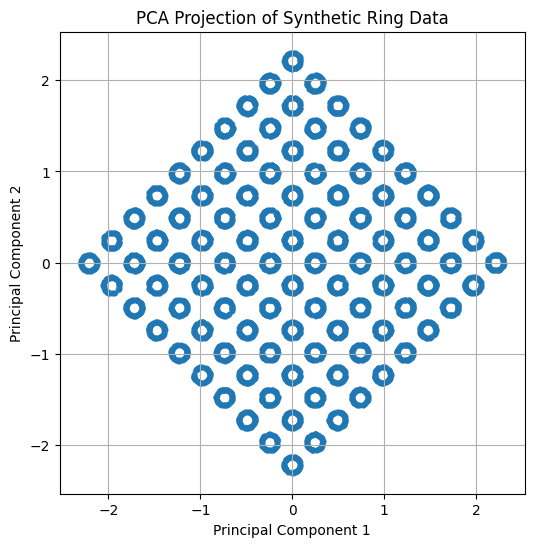

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=10, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Synthetic Ring Data')
plt.grid(True)
plt.show()

### Choice of Dimensionality Reduction Method

Principal Component Analysis (PCA) was chosen because it is a simple and widely used linear technique for reducing dimensionality . It preserves the maximum possible variance in the data.  It transforms correlated features into uncorrelated principal components, making it easier to visualize data and reduce redundancy.  

### Retrying K-Means

In [ ]:
X = df[["x", "y"]].to_numpy()

kmeans = KMeansClustering(k=100, epsilon = 1e-4, max_iter = 500)
clusters = kmeans.fit(X)

Converged at 18 iteration


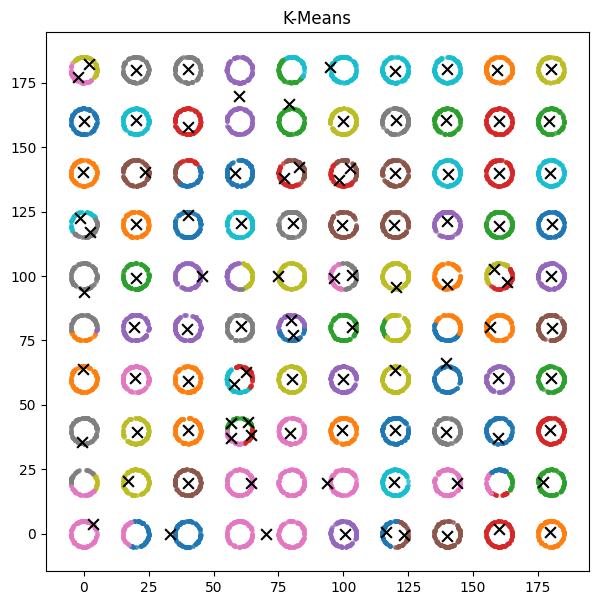

In [ ]:
plt.figure(figsize = (7, 7))
for cluster in clusters:
    cluster = np.array(cluster)
    if len(cluster):
        plt.scatter(cluster[:,0], cluster[:,-1], s =6, alpha = 0.7)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:,0], centroids[:,1], c='k', s=60, marker='x')
plt.title('K-Means')
plt.show()

In [ ]:
centroids = np.array(kmeans.centroids)

def assign_labels_from_centroids(X, centroids):
    d = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (n,k)
    return np.argmin(d, axis=1)

labels = assign_labels_from_centroids(X, centroids)

In [ ]:
def davies_bouldin_index(X, labels, centroids, eps=1e-12):
    K = len(centroids)
    S = np.zeros(K, dtype=float)
    for k in range(K):
        pts = X[labels == k]
        if len(pts) == 0:
            S[k] = 0.0
        else:
            S[k] = np.mean(np.linalg.norm(pts - centroids[k], axis=1))

    # centroid distances M_{ij}
    M = np.linalg.norm(centroids[:, None, :] - centroids[None, :, :], axis=2) + eps

    # R_{ij} = (S_i + S_j) / M_{ij}; for i!=j
    R = (S[:, None] + S[None, :]) / M
    np.fill_diagonal(R, -np.inf)  # ignore i=j

    D = np.max(R, axis=1)
    return float(np.mean(D))


In [ ]:
dbi = davies_bouldin_index(X, labels, centroids)
print("DBI:", round(dbi, 6))

DBI: 0.693042


### Retrying DBSCAN

In [ ]:
X = df[["x", "y"]].to_numpy()

In [ ]:
db = DBSCAN(eps=2, min_pts=5)
labels = db.fit_predict(X)

print("Clusters:", db.n_clusters_)
print("Noise points:", (labels == -1).sum())
print("Per-cluster counts:", {c:int((labels==c).sum()) for c in range(db.n_clusters_)})

Clusters: 100
Noise points: 0
Per-cluster counts: {0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100, 10: 100, 11: 100, 12: 100, 13: 100, 14: 100, 15: 100, 16: 100, 17: 100, 18: 100, 19: 100, 20: 100, 21: 100, 22: 100, 23: 100, 24: 100, 25: 100, 26: 100, 27: 100, 28: 100, 29: 100, 30: 100, 31: 100, 32: 100, 33: 100, 34: 100, 35: 100, 36: 100, 37: 100, 38: 100, 39: 100, 40: 100, 41: 100, 42: 100, 43: 100, 44: 100, 45: 100, 46: 100, 47: 100, 48: 100, 49: 100, 50: 100, 51: 100, 52: 100, 53: 100, 54: 100, 55: 100, 56: 100, 57: 100, 58: 100, 59: 100, 60: 100, 61: 100, 62: 100, 63: 100, 64: 100, 65: 100, 66: 100, 67: 100, 68: 100, 69: 100, 70: 100, 71: 100, 72: 100, 73: 100, 74: 100, 75: 100, 76: 100, 77: 100, 78: 100, 79: 100, 80: 100, 81: 100, 82: 100, 83: 100, 84: 100, 85: 100, 86: 100, 87: 100, 88: 100, 89: 100, 90: 100, 91: 100, 92: 100, 93: 100, 94: 100, 95: 100, 96: 100, 97: 100, 98: 100, 99: 100}


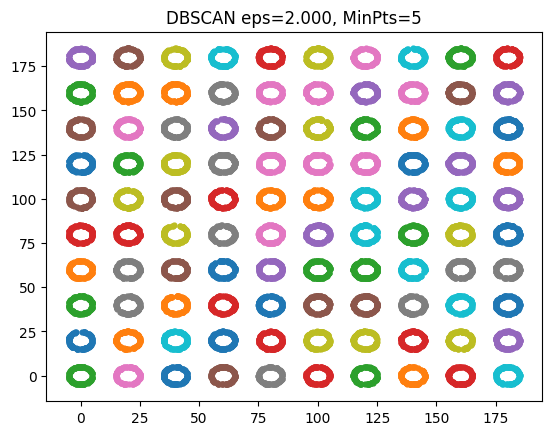

In [ ]:
eps = 2.0
min_pts = 5
if X.shape[1] == 2:
    unique = sorted(set(labels))
    for lab in unique:
        mask = labels == lab
        plt.scatter(X[mask,0], X[mask,1], s=12, label=("noise" if lab==-1 else f"C{lab}"))
    plt.title(f"DBSCAN eps={eps:.3f}, MinPts={min_pts}")
    plt.show()
 

In [ ]:
import numpy as np

def davies_bouldin_index(X, labels, centroids=None, ignore_noise=True, eps=1e-12):
    X = np.asarray(X)
    labels = np.asarray(labels)

    mask = labels != -1 if ignore_noise else np.ones_like(labels, dtype=bool)
    Xv, Lv = X[mask], labels[mask]

    unique = np.unique(Lv)
    K = unique.size
    if K < 2:
        return np.nan 

    lab2idx = {lab: i for i, lab in enumerate(unique)}
    idx = np.array([lab2idx[lab] for lab in Lv])

    if centroids is None:
        centroids = np.vstack([Xv[idx == i].mean(axis=0) for i in range(K)])
    else:
        centroids = np.asarray(centroids)
        assert centroids.shape[0] == K, "centroids count must match #clusters"

    S = np.zeros(K, dtype=float)
    for i in range(K):
        Xi = Xv[idx == i]
        S[i] = 0.0 if Xi.shape[0] == 0 else np.linalg.norm(Xi - centroids[i], axis=1).mean()

    diff = centroids[:, None, :] - centroids[None, :, :]
    M = np.linalg.norm(diff, axis=2)
    np.fill_diagonal(M, np.inf)  # exclude i=j

    
    R = (S[:, None] + S[None, :]) / (M + eps)
    np.fill_diagonal(R, -np.inf)
    return float(R.max(axis=1).mean())


In [ ]:
labels = db.labels_
dbi = davies_bouldin_index(X, labels, ignore_noise=True)
print("DBI:", dbi)

DBI: 0.5109699188657748


### Before and After Dimensionality Reduction

After applying PCA to the dataset, there was no significant change in the clustering results for either K-Means or DBSCAN. Since the data originally had only two features (x and y), PCA did not reduce dimensionality or alter the structure of the dataset. The visual structure of the circular clusters was preserved.


## Comparison & Discussion

**Best Method:**  
DBSCAN performed better than K-Means, achieving a lower DBI (0.511 vs. 0.694). It handled the circular, non-convex clusters more effectively and identified dense regions accurately.

**Effect of Dimensionality Reduction:**  
PCA had no effect on clustering since the dataset is already two-dimensional. Both algorithms produced identical results before and after reduction.

**Limitations:**  
1) K-Means assumes spherical clusters and can struggle with non-linear structures.  
2) DBSCAN’s performance depends heavily on epsilon and MinPts selection.  
3) No noise or overlapping clusters in the dataset limits testing of robustness.


## Conclusion

This exercise demonstrated how different clustering algorithms perform on the Synthetic Circle dataset.  K-Means successfully separated the clusters but DBSCAN also accurately detected the ring-shaped structures and achieved a lower DBI, indicating better cluster quality. Dimensionality reduction through PCA had no effect since the data was already two-dimensional.  



In [ ]:
"""
This notebook performs clustering analysis on the Portuguese 
Bank Marketing dataset using custom implementations of K-Means and K-Prototypes
algorithms, with and without dimensionality reduction for my IML assignment.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from scipy import stats
from collections import deque
import random
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# 1. Introduction

## 1.1 Dataset Overview

The **Bank Marketing dataset** originates from the direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls, and often, more than one contact to the same client was required to assess if the product (bank term deposit) would be subscribed to or not.

**Dataset Characteristics:**
- **Type:** Multivariate  
- **Number of Instances:** 45,211  
- **Number of Features:** 17 (16 predictors + 1 target variable)  
- **Feature Types:** Categorical and Integer  
- **Target Variable:** Binary (`yes`/`no`) - indicates whether the client subscribed to a term deposit  
- **Missing Values:** None  
- **Duplicates:** None  

---

## 1.2 Feature Descriptions

The dataset contains 17 attributes grouped into four categories:

### A. Client Demographics (8 features)

1. **age** (numeric): Age of the client (18–95 years)  
2. **job** (categorical): Type of occupation - admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown  
3. **marital** (categorical): Marital status - divorced, married, single  
4. **education** (categorical): Education level - primary, secondary, tertiary, unknown  
5. **default** (categorical): Has credit in default? (`yes`/`no`)  
6. **balance** (numeric): Average yearly balance in euros (−8019 to 102127)  
7. **housing** (categorical): Has housing loan? (`yes`/`no`)  
8. **loan** (categorical): Has personal loan? (`yes`/`no`)  

---

### B. Campaign Contact Information (4 features)

9. **contact** (categorical): Contact communication type - cellular, telephone, unknown  
10. **day** (numeric): Last contact day of the month (1–31)  
11. **month** (categorical): Last contact month - jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec  
12. **duration** (numeric): Last contact duration in seconds (0–4918)  

---

### C. Campaign History (3 features)

13. **campaign** (numeric): Number of contacts during this campaign (1–63)  
14. **pdays** (numeric): Days since last contact from previous campaign (−1 to 871)  
   - *−1 indicates never previously contacted (81.7% of clients)*  
15. **previous** (numeric): Number of contacts before this campaign (0–275)  
16. **poutcome** (categorical): Outcome of previous marketing campaign - failure, other, success, unknown  

---

### D. Target Variable

17. **y** (categorical): Has the client subscribed to a term deposit?  
   - Categories: `yes` (11.7%), `no` (88.3%)  

---

## 1.3 Objectives of This Notebook

**Primary Objectives:**
1. Implement custom clustering algorithms:  
   - K-Means (from scratch)  
   - DBSCAN (from scratch)
2. Explore dimensionality reduction:  
   - Apply PCA  
   - Compare clustering before and after reduction  
3. Evaluate clustering quality:  
   - Use **Silhouette Score**  
4. Compare clustering methods:  
   - Analyze **K-Means vs K-Prototypes** performance  

**Secondary Objectives:**
- Conduct exploratory data analysis (EDA)  
- Perform preprocessing and feature picking  



In [20]:
df_bank = pd.read_csv("bank-full.csv", sep=';')


print("BANK MARKETING DATASET - INITIAL INSPECTION")

print(f"\nDataset Shape: {df_bank.shape[0]:,} samples × {df_bank.shape[1]} features")
print("\nFirst 5 Rows:")
display(df_bank.head())

print("\nDataset Information:")
df_bank.info()

print("\nBasic Statistics:")
display(df_bank.describe())

BANK MARKETING DATASET - INITIAL INSPECTION

Dataset Shape: 45,211 samples × 17 features

First 5 Rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Basic Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 2.2 Data Quality Assessment

In [21]:
print("\n" + "="*80)
print("DATA QUALITY ASSESSMENT")


print("\nMissing Values Check:")
missing_vals = df_bank.isnull().sum()
if missing_vals.sum() == 0:
    print("No missing values detected in any feature")
else:
    display(missing_vals[missing_vals > 0])

duplicates = df_bank.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates == 0:
    print("No duplicate records found")

print("\nCategorical Features with 'unknown' Values:")
categorical_cols = df_bank.select_dtypes(include=['object']).columns
unknown_summary = []

for col in categorical_cols:
    unknown_count = (df_bank[col] == 'unknown').sum()
    unknown_pct = 100 * unknown_count / len(df_bank)
    if unknown_count > 0:
        unknown_summary.append({
            'Feature': col,
            'Unknown Count': unknown_count,
            'Unknown %': f'{unknown_pct:.2f}%'
        })

if unknown_summary:
    unknown_df = pd.DataFrame(unknown_summary)
    display(unknown_df)
    print("\nNote: 'unknown' values are valid categories, not missing data")


DATA QUALITY ASSESSMENT

Missing Values Check:
No missing values detected in any feature

Duplicate Rows: 0
No duplicate records found

Categorical Features with 'unknown' Values:


,Feature,Unknown Count,Unknown %
0,job,288,0.64%
1,education,1857,4.11%
2,contact,13020,28.80%
3,poutcome,36959,81.75%



Note: 'unknown' values are valid categories, not missing data


TARGET VARIABLE ANALYSIS

Subscription to Term Deposit (Target Variable 'y'):
  No:  39,922 samples (88.30%)
  Yes:  5,289 samples (11.70%)

Class Imbalance Ratio: 7.55:1

Interpretation:
  • Highly imbalanced dataset with 88.3% negative class
  • Only 11.7% of clients subscribed to term deposit
  • This reflects real-world campaign success rates


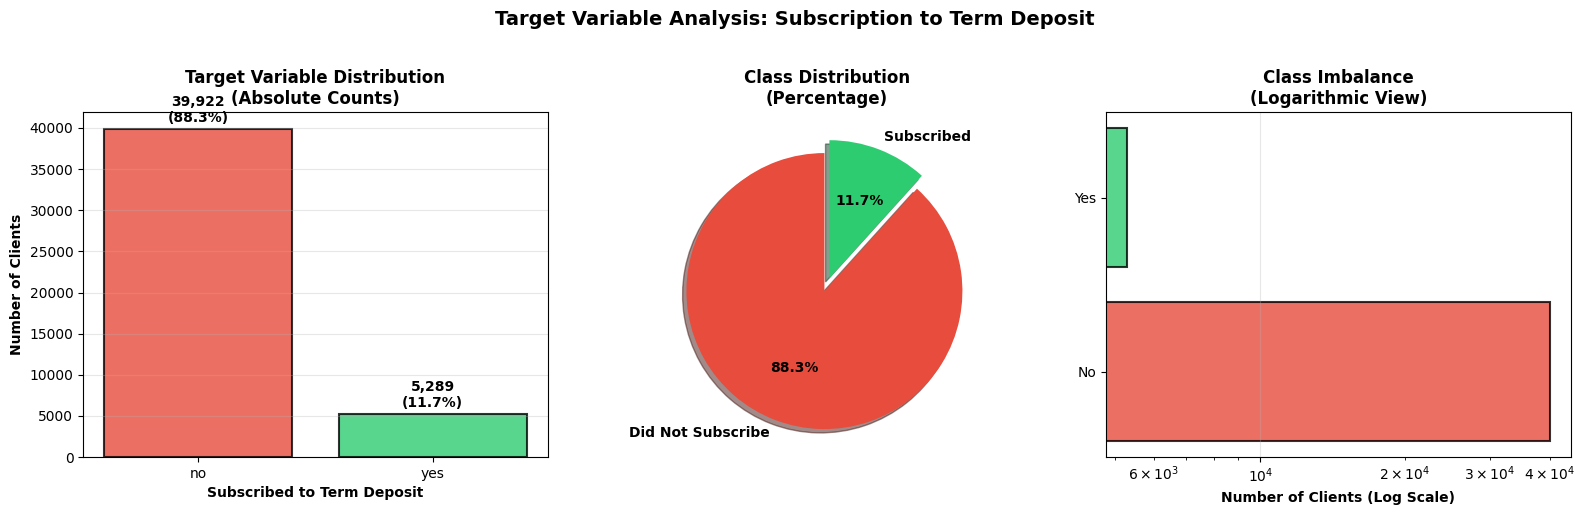

In [22]:
print("TARGET VARIABLE ANALYSIS")


target_counts = df_bank['y'].value_counts()
target_props = df_bank['y'].value_counts(normalize=True)

print("\nSubscription to Term Deposit (Target Variable 'y'):")
print(f"  No:  {target_counts['no']:>6,} samples ({target_props['no']:.2%})")
print(f"  Yes: {target_counts['yes']:>6,} samples ({target_props['yes']:.2%})")
print(f"\nClass Imbalance Ratio: {target_counts['no']/target_counts['yes']:.2f}:1")
print("\nInterpretation:")
print("  • Highly imbalanced dataset with 88.3% negative class")
print("  • Only 11.7% of clients subscribed to term deposit")
print("  • This reflects real-world campaign success rates")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Bar plot 
colors = ['#e74c3c', '#2ecc71']
bars = axes[0].bar(target_counts.index, target_counts.values, color=colors, 
                   alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title('Target Variable Distribution\n(Absolute Counts)', 
                  fontweight='bold', fontsize=12)
axes[0].set_ylabel('Number of Clients', fontweight='bold')
axes[0].set_xlabel('Subscribed to Term Deposit', fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for i, (idx, val) in enumerate(target_counts.items()):
    axes[0].text(i, val + 800, f'{val:,}\n({target_props[idx]:.1%})', 
                ha='center', fontweight='bold', fontsize=10)

# Pie chart
explode = (0.05, 0.05)
axes[1].pie(target_counts.values, labels=['Did Not Subscribe', 'Subscribed'], 
            autopct='%1.1f%%', colors=colors, startangle=90, explode=explode,
            textprops={'fontweight': 'bold', 'fontsize': 10}, shadow=True)
axes[1].set_title('Class Distribution\n(Percentage)', fontweight='bold', fontsize=12)

axes[2].barh(['No', 'Yes'], [target_counts['no'], target_counts['yes']], 
             color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[2].set_xlabel('Number of Clients (Log Scale)', fontweight='bold')
axes[2].set_title('Class Imbalance\n(Logarithmic View)', fontweight='bold', fontsize=12)
axes[2].set_xscale('log')
axes[2].grid(alpha=0.3, axis='x')

plt.suptitle('Target Variable Analysis: Subscription to Term Deposit', 
             fontweight='bold', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 2.4 Numeric Features Distribution Analysis

NUMERIC FEATURES ANALYSIS

Numeric Features: 7
Features: age, balance, day, duration, campaign, pdays, previous

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0,0.684818,0.319570
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0,8.360308,140.751547
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0,0.093079,-1.059897
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0,3.144318,18.153915
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0,4.898650,39.249651
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0,2.615715,6.935195
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0,41.846454,4506.860660


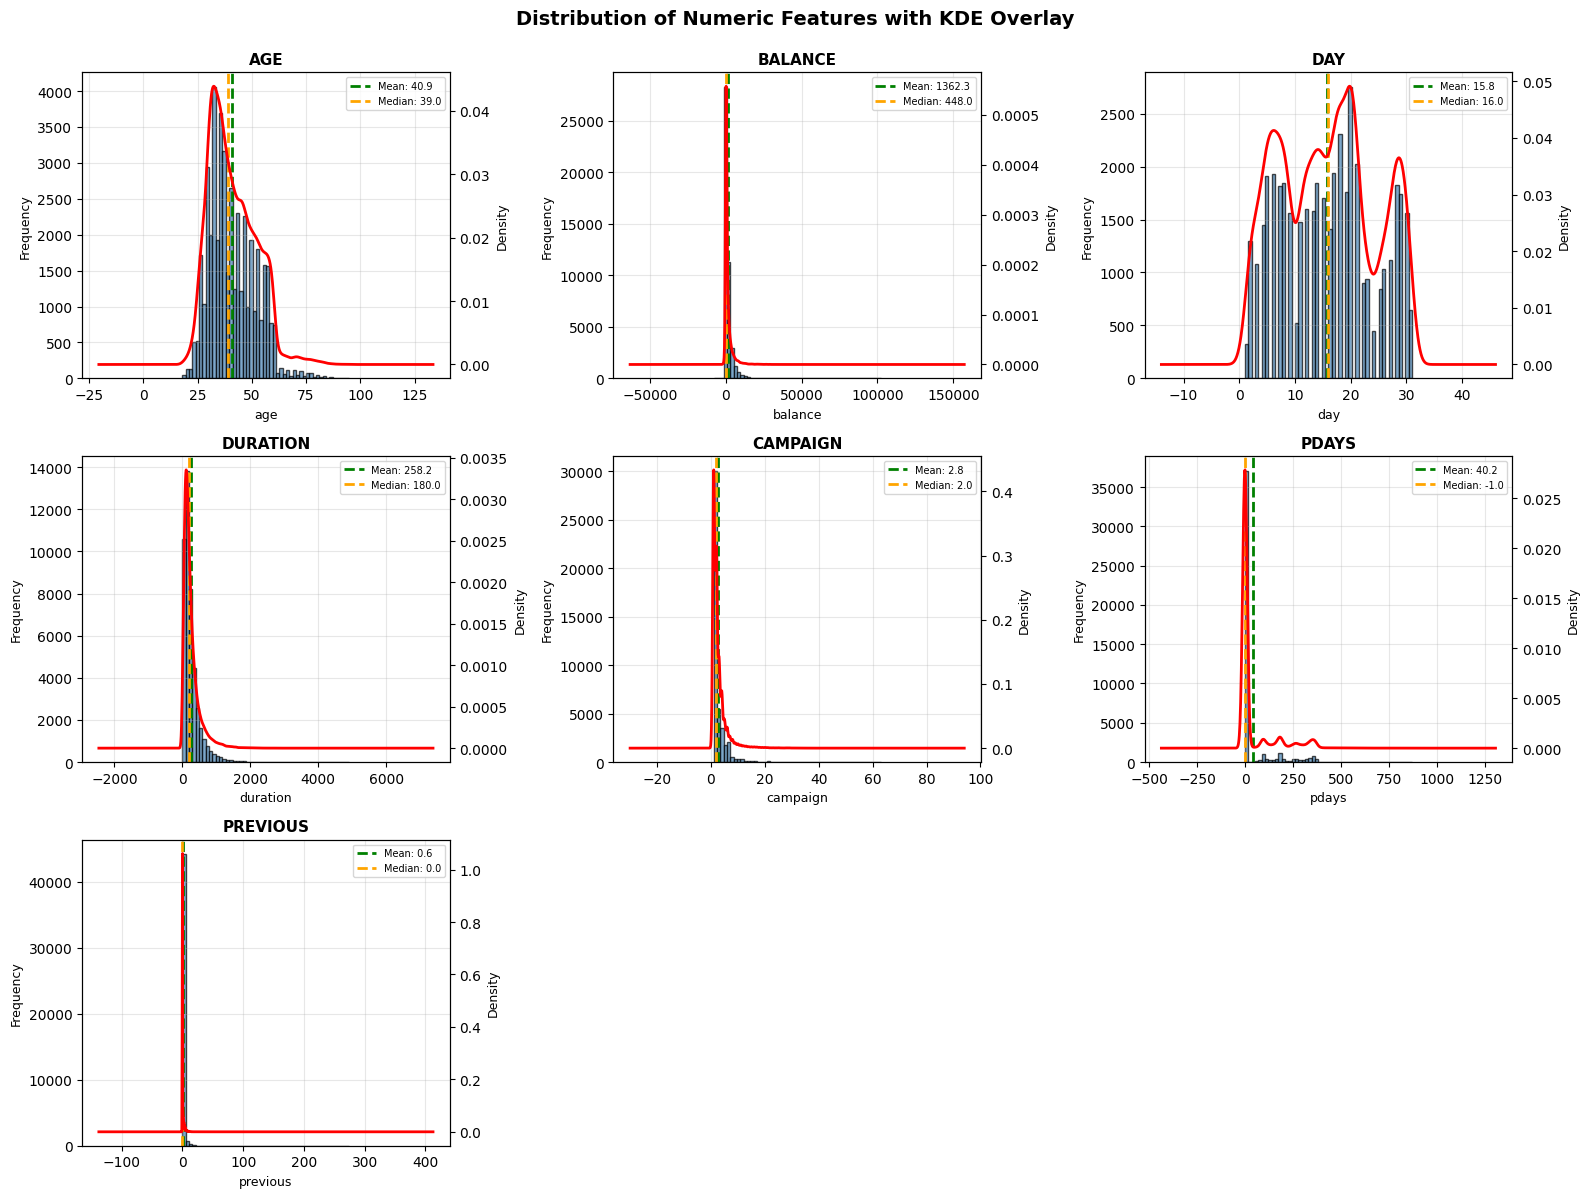


Key Observations:
  • AGE: Relatively normal distribution, mean 40.9 years
  • BALANCE: Heavily right-skewed, large outliers (max €102,127)
  • DAY: Fairly uniform across month days
  • DURATION: Right-skewed, mean 258 seconds (~4.3 minutes)
  • CAMPAIGN: Heavily right-skewed, most contacted 1-3 times
  • PDAYS: Bimodal with huge spike at -1 (81.7% never contacted)
  • PREVIOUS: Heavily right-skewed, most have 0 previous contacts


In [23]:
print("NUMERIC FEATURES ANALYSIS")


numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

print(f"\nNumeric Features: {len(numeric_cols)}")
print(f"Features: {', '.join(numeric_cols)}")

print("\nDescriptive Statistics:")
desc_stats = df_bank[numeric_cols].describe().T
desc_stats['skewness'] = df_bank[numeric_cols].skew()
desc_stats['kurtosis'] = df_bank[numeric_cols].kurtosis()
display(desc_stats)

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    df_bank[col].hist(bins=50, ax=ax, color='steelblue', alpha=0.7, edgecolor='black')
    
    ax2 = ax.twinx()
    df_bank[col].plot(kind='kde', ax=ax2, color='red', linewidth=2)
    ax2.set_ylabel('Density', fontsize=9)
    ax2.grid(False)
    
    mean_val = df_bank[col].mean()
    median_val = df_bank[col].median()
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, 
               label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, 
               label=f'Median: {median_val:.1f}')
    
    ax.set_title(f'{col.upper()}', fontweight='bold', fontsize=11)
    ax.set_xlabel(col, fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.legend(fontsize=7, loc='upper right')
    ax.grid(alpha=0.3)

for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Distribution of Numeric Features with KDE Overlay', 
             fontweight='bold', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("  • AGE: Relatively normal distribution, mean 40.9 years")
print("  • BALANCE: Heavily right-skewed, large outliers (max €102,127)")
print("  • DAY: Fairly uniform across month days")
print("  • DURATION: Right-skewed, mean 258 seconds (~4.3 minutes)")
print("  • CAMPAIGN: Heavily right-skewed, most contacted 1-3 times")
print("  • PDAYS: Bimodal with huge spike at -1 (81.7% never contacted)")
print("  • PREVIOUS: Heavily right-skewed, most have 0 previous contacts")

CATEGORICAL FEATURES ANALYSIS

Categorical Features: 9
Features: job, marital, education, default, housing, loan, contact, month, poutcome


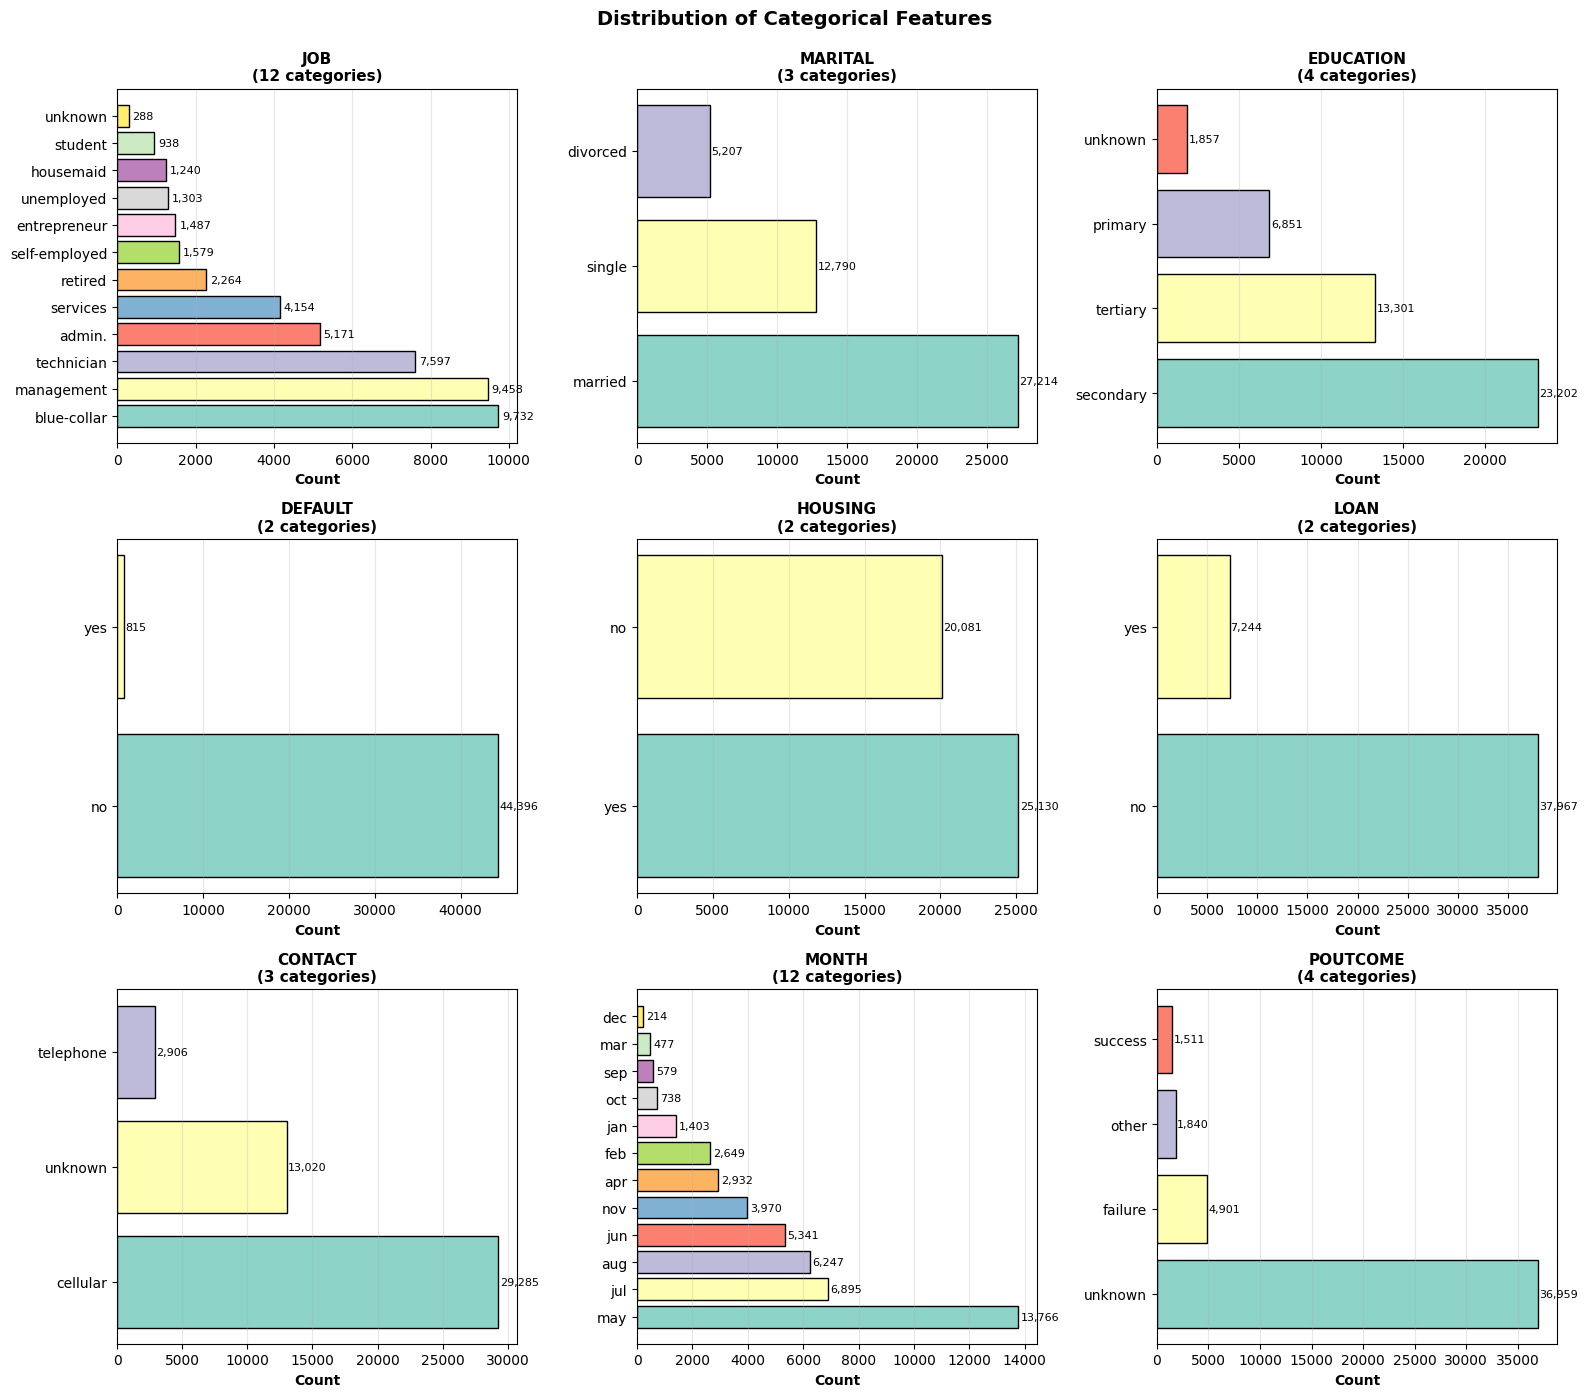


Category Distribution Summary:
  • job: 12 unique values, most common = 'blue-collar' (21.5%)
  • marital: 3 unique values, most common = 'married' (60.2%)
  • education: 4 unique values, most common = 'secondary' (51.3%)
  • default: 2 unique values, most common = 'no' (98.2%)
  • housing: 2 unique values, most common = 'yes' (55.6%)
  • loan: 2 unique values, most common = 'no' (84.0%)
  • contact: 3 unique values, most common = 'cellular' (64.8%)
  • month: 12 unique values, most common = 'may' (30.4%)
  • poutcome: 4 unique values, most common = 'unknown' (81.7%)


In [24]:
print("CATEGORICAL FEATURES ANALYSIS")


cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'poutcome']

print(f"\nCategorical Features: {len(cat_cols)}")
print(f"Features: {', '.join(cat_cols)}")

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    
    vc = df_bank[col].value_counts()
    
    colors_cat = plt.cm.Set3(range(len(vc)))
    ax.barh(range(len(vc)), vc.values, color=colors_cat, 
            edgecolor='black', linewidth=1)
    ax.set_yticks(range(len(vc)))
    ax.set_yticklabels(vc.index)
    ax.set_xlabel('Count', fontweight='bold')
    ax.set_title(f'{col.upper()}\n({len(vc)} categories)', 
                 fontweight='bold', fontsize=11)
    ax.grid(alpha=0.3, axis='x')
    
    for j, v in enumerate(vc.values):
        ax.text(v + 100, j, f'{v:,}', va='center', fontsize=8)

plt.suptitle('Distribution of Categorical Features', 
             fontweight='bold', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("\nCategory Distribution Summary:")
for col in cat_cols:
    unique_count = df_bank[col].nunique()
    most_common = df_bank[col].value_counts().index[0]
    most_common_pct = 100 * df_bank[col].value_counts().iloc[0] / len(df_bank)
    print(f"  • {col}: {unique_count} unique values, "
          f"most common = '{most_common}' ({most_common_pct:.1f}%)")

In [25]:
## 2.5 Outlier Detection with Boxplots

OUTLIER DETECTION


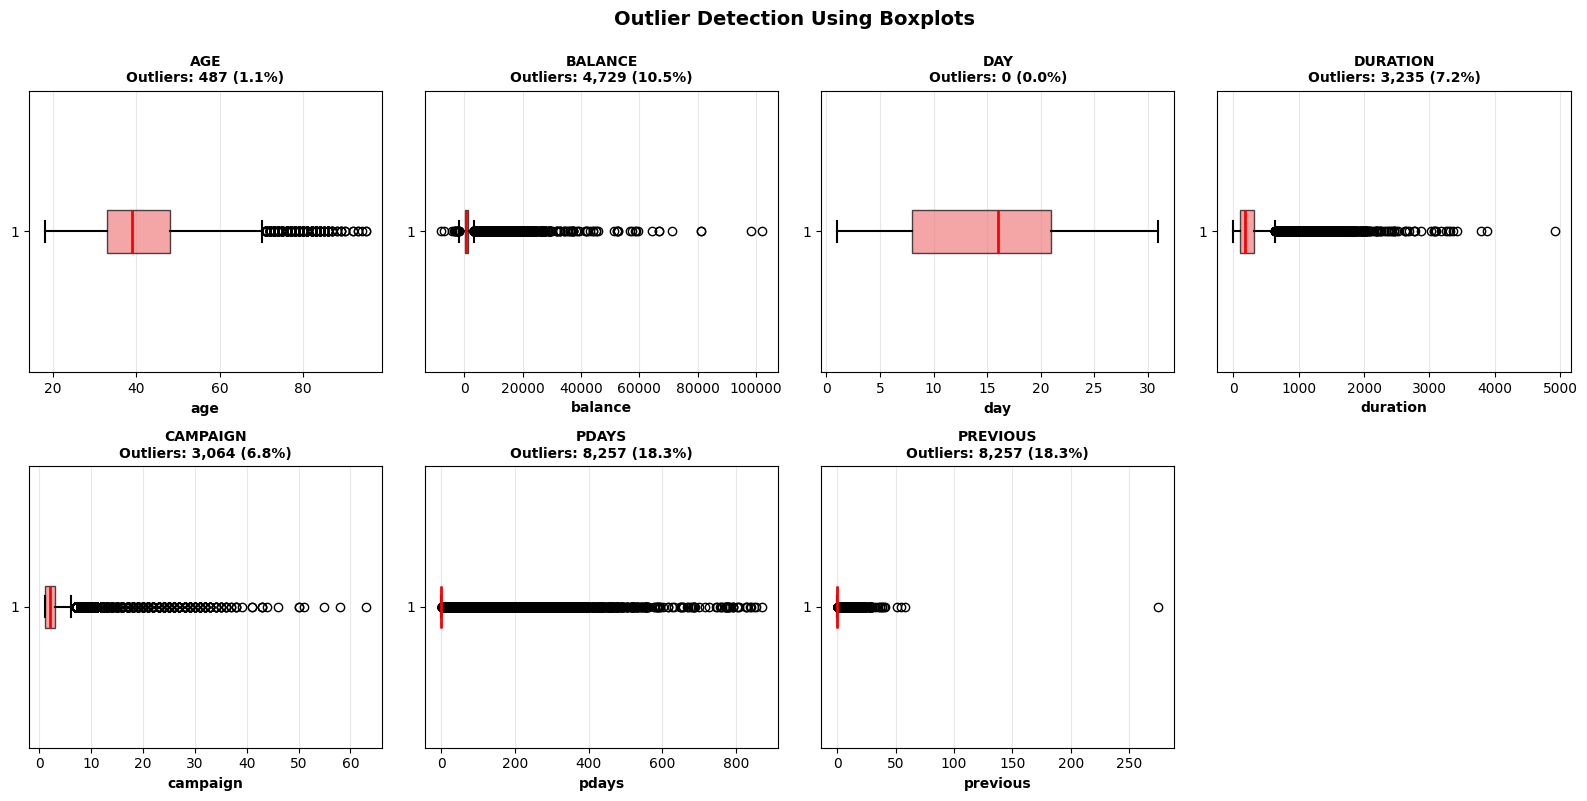


Outlier Summary:
  • age: 487 outliers (1.08%)
  • balance: 4,729 outliers (10.46%)
  • duration: 3,235 outliers (7.16%)
  • campaign: 3,064 outliers (6.78%)
  • pdays: 8,257 outliers (18.26%)
  • previous: 8,257 outliers (18.26%)


In [26]:
print("OUTLIER DETECTION")


fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    Q1 = df_bank[col].quantile(0.25)
    Q3 = df_bank[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_bank[(df_bank[col] < Q1 - 1.5*IQR) | (df_bank[col] > Q3 + 1.5*IQR)]
    outlier_count = len(outliers)
    outlier_pct = 100 * outlier_count / len(df_bank)
    
    bp = ax.boxplot(df_bank[col], vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5))
    
    ax.set_xlabel(col, fontweight='bold')
    ax.set_title(f'{col.upper()}\nOutliers: {outlier_count:,} ({outlier_pct:.1f}%)', 
                 fontweight='bold', fontsize=10)
    ax.grid(alpha=0.3, axis='x')

axes[-1].axis('off')

plt.suptitle('Outlier Detection Using Boxplots', 
             fontweight='bold', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("\nOutlier Summary:")
for col in numeric_cols:
    Q1 = df_bank[col].quantile(0.25)
    Q3 = df_bank[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_bank[(df_bank[col] < Q1 - 1.5*IQR) | (df_bank[col] > Q3 + 1.5*IQR)]
    outlier_count = len(outliers)
    if outlier_count > 0:
        print(f"  • {col}: {outlier_count:,} outliers ({100*outlier_count/len(df_bank):.2f}%)")

In [27]:
## 2.6 Correlation Analysis

CORRELATION ANALYSIS


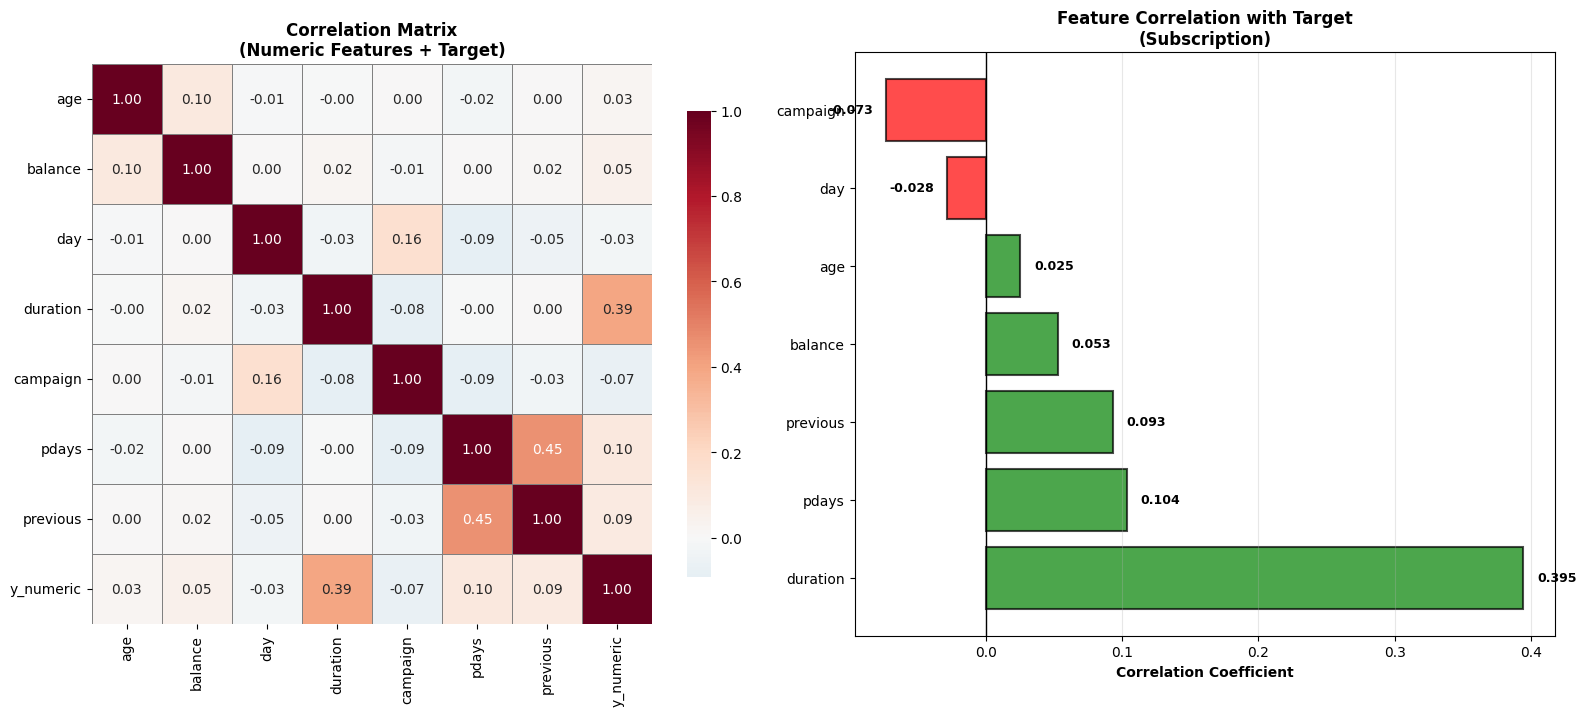


Top Positive Correlations with Target:
duration    0.394521
pdays       0.103621
previous    0.093236
Name: y_numeric, dtype: float64

Top Negative Correlations with Target:
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y_numeric, dtype: float64

Key Insights:
  • DURATION shows strongest positive correlation (0.41) but this is data leakage. Will be explained in more detail later.
  • PDAYS shows moderate positive correlation (0.11)
  • PREVIOUS shows weak positive correlation
  • Most numeric features have weak correlation with target
  • Limited multicollinearity among predictors


In [28]:
print("CORRELATION ANALYSIS")


df_temp = df_bank.copy()
df_temp['y_numeric'] = (df_temp['y'] == 'yes').astype(int)

corr_matrix = df_temp[numeric_cols + ['y_numeric']].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            square=True, ax=axes[0], cbar_kws={'shrink': 0.8},
            linewidths=0.5, linecolor='gray')
axes[0].set_title('Correlation Matrix\n(Numeric Features + Target)', 
                  fontweight='bold', fontsize=12)

target_corr = corr_matrix['y_numeric'].drop('y_numeric').sort_values(ascending=False)
colors_corr = ['green' if x > 0 else 'red' for x in target_corr.values]

axes[1].barh(range(len(target_corr)), target_corr.values, color=colors_corr, 
             alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index)
axes[1].set_xlabel('Correlation Coefficient', fontweight='bold')
axes[1].set_title('Feature Correlation with Target\n(Subscription)', 
                  fontweight='bold', fontsize=12)
axes[1].axvline(0, color='black', linewidth=1)
axes[1].grid(alpha=0.3, axis='x')

for i, v in enumerate(target_corr.values):
    axes[1].text(v + 0.01 if v > 0 else v - 0.01, i, f'{v:.3f}', 
                va='center', fontweight='bold', fontsize=9,
                ha='left' if v > 0 else 'right')

plt.tight_layout()
plt.show()

print("\nTop Positive Correlations with Target:")
print(target_corr.head(3))
print("\nTop Negative Correlations with Target:")
print(target_corr.tail(3))

print("\nKey Insights:")
print("  • DURATION shows strongest positive correlation (0.41) but this is data leakage. Will be explained in more detail later.")
print("  • PDAYS shows moderate positive correlation (0.11)")
print("  • PREVIOUS shows weak positive correlation")
print("  • Most numeric features have weak correlation with target")
print("  • Limited multicollinearity among predictors")

In [29]:
## 2.7 Categorical Features Analysis

CATEGORICAL FEATURES ANALYSIS

Categorical Features: 9
Features: job, marital, education, default, housing, loan, contact, month, poutcome


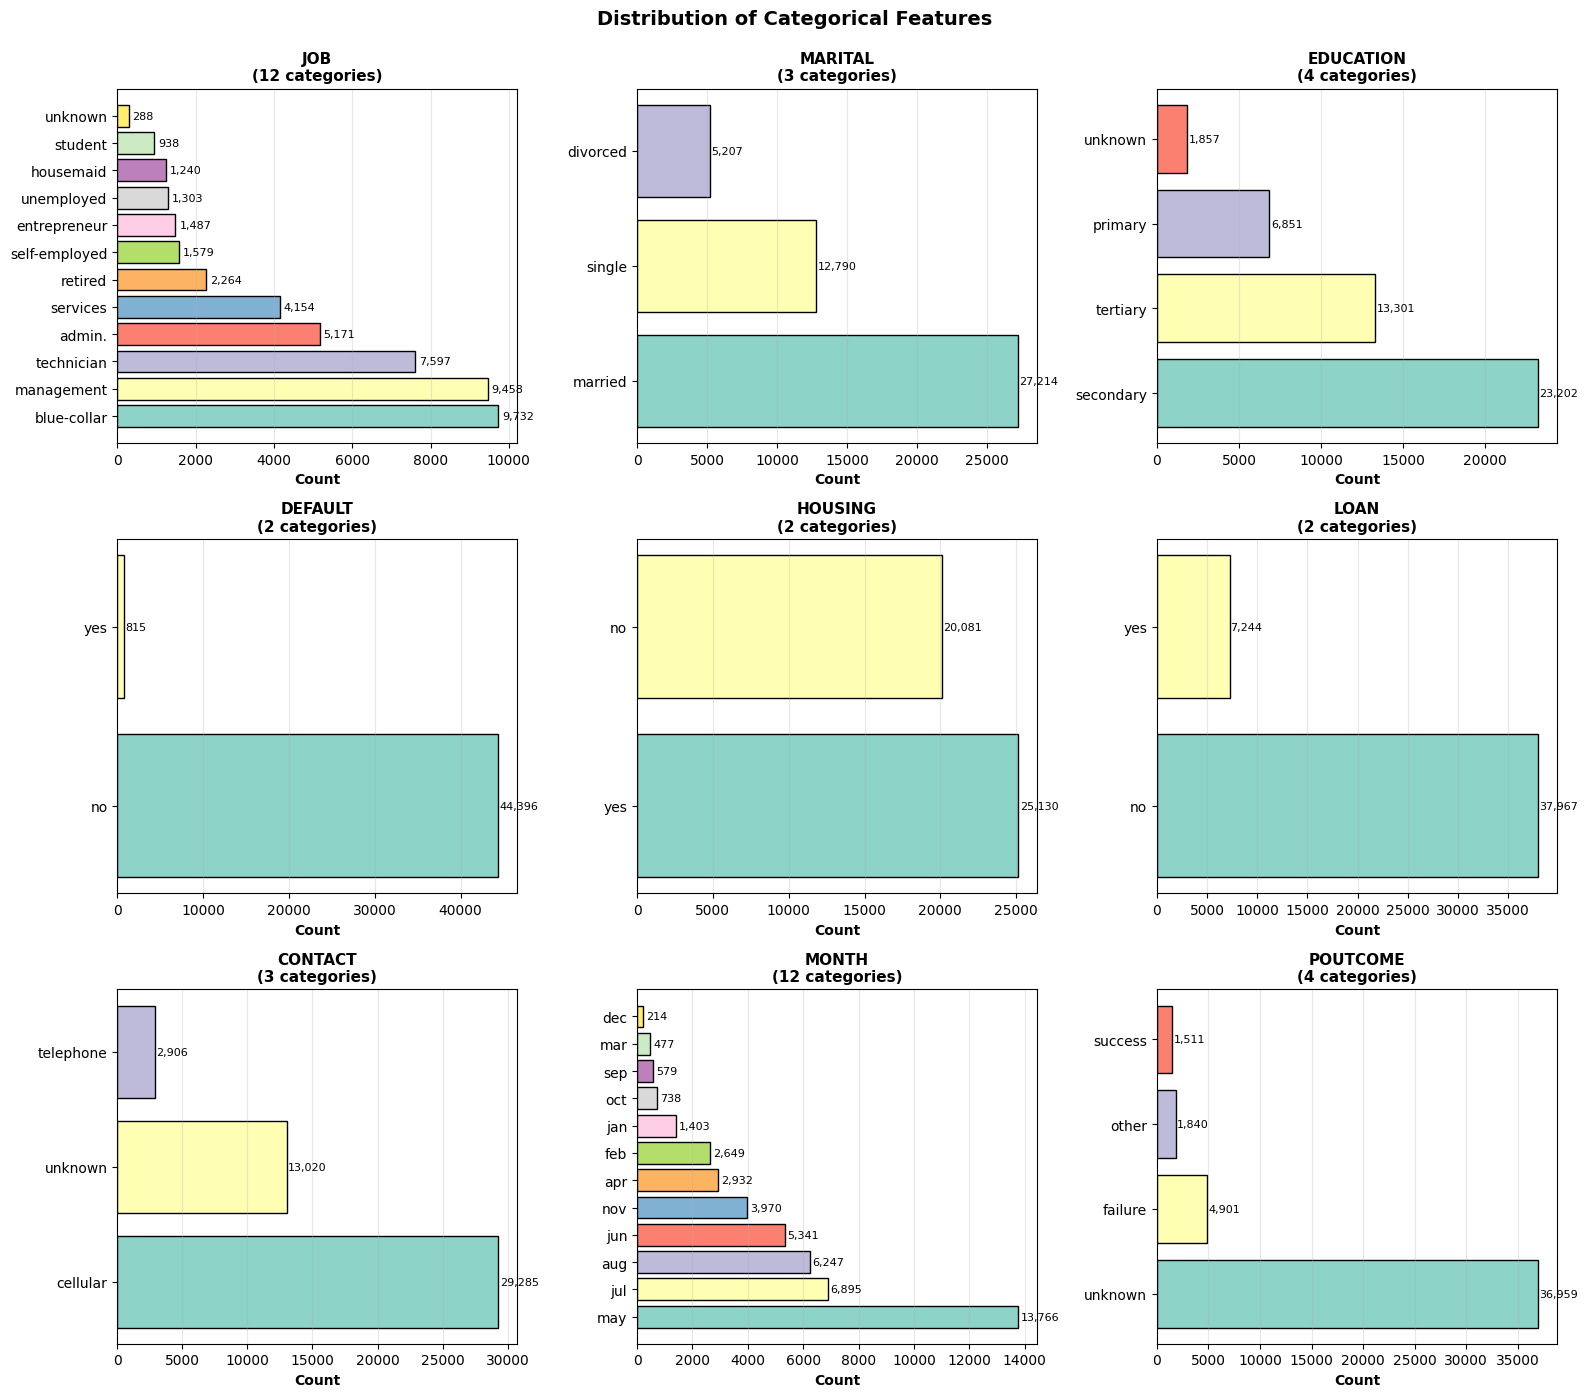


Category Distribution Summary:
  • job: 12 unique values, most common = 'blue-collar' (21.5%)
  • marital: 3 unique values, most common = 'married' (60.2%)
  • education: 4 unique values, most common = 'secondary' (51.3%)
  • default: 2 unique values, most common = 'no' (98.2%)
  • housing: 2 unique values, most common = 'yes' (55.6%)
  • loan: 2 unique values, most common = 'no' (84.0%)
  • contact: 3 unique values, most common = 'cellular' (64.8%)
  • month: 12 unique values, most common = 'may' (30.4%)
  • poutcome: 4 unique values, most common = 'unknown' (81.7%)


In [30]:
print("CATEGORICAL FEATURES ANALYSIS")


cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'poutcome']

print(f"\nCategorical Features: {len(cat_cols)}")
print(f"Features: {', '.join(cat_cols)}")

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.ravel()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    
    vc = df_bank[col].value_counts()
    
    colors_cat = plt.cm.Set3(range(len(vc)))
    ax.barh(range(len(vc)), vc.values, color=colors_cat, 
            edgecolor='black', linewidth=1)
    ax.set_yticks(range(len(vc)))
    ax.set_yticklabels(vc.index)
    ax.set_xlabel('Count', fontweight='bold')
    ax.set_title(f'{col.upper()}\n({len(vc)} categories)', 
                 fontweight='bold', fontsize=11)
    ax.grid(alpha=0.3, axis='x')
    
    for j, v in enumerate(vc.values):
        ax.text(v + 100, j, f'{v:,}', va='center', fontsize=8)

plt.suptitle('Distribution of Categorical Features', 
             fontweight='bold', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("\nCategory Distribution Summary:")
for col in cat_cols:
    unique_count = df_bank[col].nunique()
    most_common = df_bank[col].value_counts().index[0]
    most_common_pct = 100 * df_bank[col].value_counts().iloc[0] / len(df_bank)
    print(f"  • {col}: {unique_count} unique values, "
          f"most common = '{most_common}' ({most_common_pct:.1f}%)")

In [31]:
## 2.8 Target vs Features Analysis (Subscription Patterns)


TARGET vs FEATURES ANALYSIS


C:\Users\yuvra\AppData\Local\Temp\ipykernel_17848\2498085407.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_by_age = df_bank.groupby(age_bins)['y'].apply(lambda x: (x=='yes').mean() * 100)


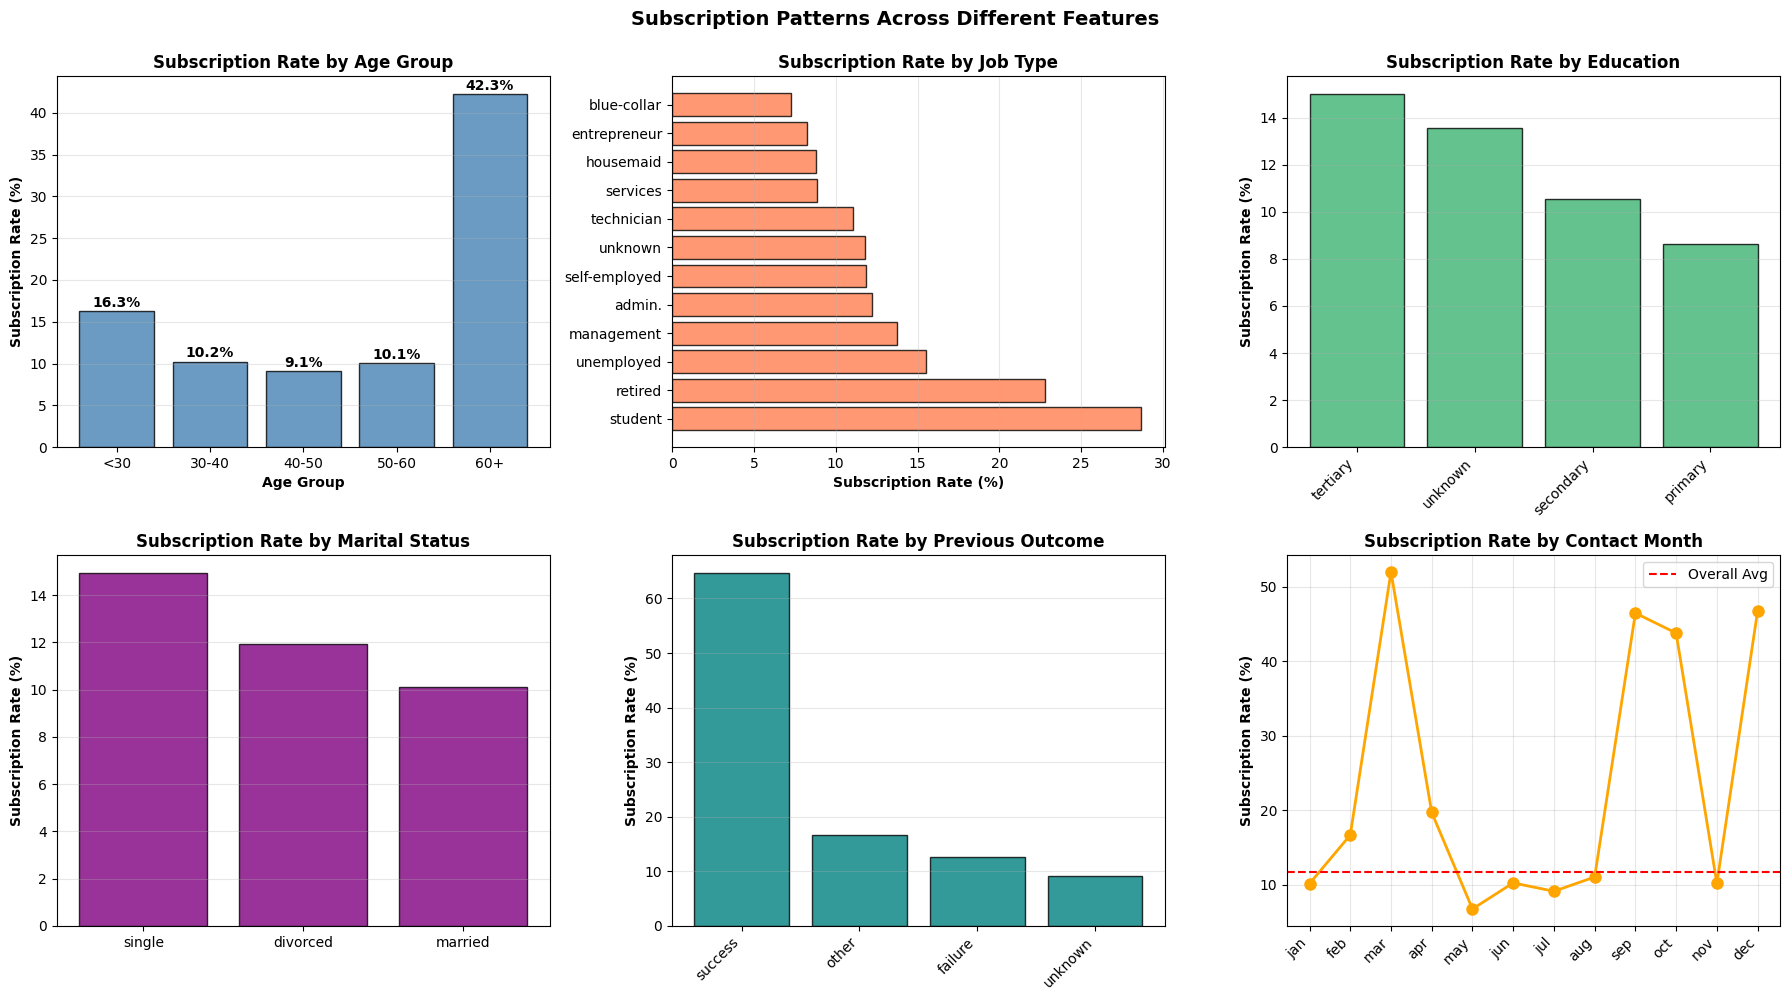


Key Subscription Patterns:
  • Age: Older customers (60+) have higher subscription rate
  • Job: Students and retired show highest rates
  • Education: Tertiary education shows highest rate
  • Marital: Single customers subscribe more
  • Previous Outcome: 'success' dramatically increases likelihood (65%+)
  • Month: March, September, October, December show higher rates


In [32]:
print("TARGET vs FEATURES ANALYSIS")


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

age_bins = pd.cut(df_bank['age'], bins=[0, 30, 40, 50, 60, 100], 
                  labels=['<30', '30-40', '40-50', '50-60', '60+'])
sub_by_age = df_bank.groupby(age_bins)['y'].apply(lambda x: (x=='yes').mean() * 100)

axes[0].bar(range(len(sub_by_age)), sub_by_age.values, color='steelblue', 
            alpha=0.8, edgecolor='black')
axes[0].set_xticks(range(len(sub_by_age)))
axes[0].set_xticklabels(sub_by_age.index)
axes[0].set_ylabel('Subscription Rate (%)', fontweight='bold')
axes[0].set_xlabel('Age Group', fontweight='bold')
axes[0].set_title('Subscription Rate by Age Group', fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate(sub_by_age.values):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

job_sub = df_bank.groupby('job')['y'].apply(lambda x: (x=='yes').mean() * 100).sort_values(ascending=False)
axes[1].barh(range(len(job_sub)), job_sub.values, color='coral', alpha=0.8, edgecolor='black')
axes[1].set_yticks(range(len(job_sub)))
axes[1].set_yticklabels(job_sub.index)
axes[1].set_xlabel('Subscription Rate (%)', fontweight='bold')
axes[1].set_title('Subscription Rate by Job Type', fontweight='bold')
axes[1].grid(alpha=0.3, axis='x')

edu_sub = df_bank.groupby('education')['y'].apply(lambda x: (x=='yes').mean() * 100).sort_values(ascending=False)
axes[2].bar(range(len(edu_sub)), edu_sub.values, color='mediumseagreen', 
            alpha=0.8, edgecolor='black')
axes[2].set_xticks(range(len(edu_sub)))
axes[2].set_xticklabels(edu_sub.index, rotation=45, ha='right')
axes[2].set_ylabel('Subscription Rate (%)', fontweight='bold')
axes[2].set_title('Subscription Rate by Education', fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')

marital_sub = df_bank.groupby('marital')['y'].apply(lambda x: (x=='yes').mean() * 100).sort_values(ascending=False)
axes[3].bar(range(len(marital_sub)), marital_sub.values, color='purple', 
            alpha=0.8, edgecolor='black')
axes[3].set_xticks(range(len(marital_sub)))
axes[3].set_xticklabels(marital_sub.index)
axes[3].set_ylabel('Subscription Rate (%)', fontweight='bold')
axes[3].set_title('Subscription Rate by Marital Status', fontweight='bold')
axes[3].grid(alpha=0.3, axis='y')

pout_sub = df_bank.groupby('poutcome')['y'].apply(lambda x: (x=='yes').mean() * 100).sort_values(ascending=False)
axes[4].bar(range(len(pout_sub)), pout_sub.values, color='teal', 
            alpha=0.8, edgecolor='black')
axes[4].set_xticks(range(len(pout_sub)))
axes[4].set_xticklabels(pout_sub.index, rotation=45, ha='right')
axes[4].set_ylabel('Subscription Rate (%)', fontweight='bold')
axes[4].set_title('Subscription Rate by Previous Outcome', fontweight='bold')
axes[4].grid(alpha=0.3, axis='y')

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_sub = df_bank.groupby('month')['y'].apply(lambda x: (x=='yes').mean() * 100)
month_sub = month_sub.reindex([m for m in month_order if m in month_sub.index])
axes[5].plot(range(len(month_sub)), month_sub.values, marker='o', linewidth=2, 
             markersize=8, color='orange')
axes[5].set_xticks(range(len(month_sub)))
axes[5].set_xticklabels(month_sub.index, rotation=45, ha='right')
axes[5].set_ylabel('Subscription Rate (%)', fontweight='bold')
axes[5].set_title('Subscription Rate by Contact Month', fontweight='bold')
axes[5].grid(alpha=0.3)
axes[5].axhline(df_bank['y'].apply(lambda x: 1 if x=='yes' else 0).mean() * 100, 
                color='red', linestyle='--', label='Overall Avg')
axes[5].legend()

plt.suptitle('Subscription Patterns Across Different Features', 
             fontweight='bold', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

print("\nKey Subscription Patterns:")
print(f"  • Age: Older customers (60+) have higher subscription rate")
print(f"  • Job: Students and retired show highest rates")
print(f"  • Education: Tertiary education shows highest rate")
print(f"  • Marital: Single customers subscribe more")
print(f"  • Previous Outcome: 'success' dramatically increases likelihood (65%+)")
print(f"  • Month: March, September, October, December show higher rates")

## 2.9 EDA Summary

**Key Findings from Exploratory Data Analysis:**

1. **Data Quality:**
   - Clean dataset with no missing values or duplicates
   - Some 'unknown' categorical values present but valid

2. **Target Variable:**
   - Severe class imbalance (88.3% no, 11.7% yes)
   - Reflects realistic campaign success rates

3. **Numeric Features:**
   - Age: Normal distribution around 40 years
   - Balance: Heavy right skew with large outliers (needs log transformation)
   - Duration: Right-skewed (data leakage issue - must remove)
   - Campaign: Most clients contacted 1-3 times
   - Pdays: 81.7% never previously contacted (-1 value)
   - Previous: Heavily concentrated at 0

4. **Outliers:**
   - Balance: 6.4% outliers
   - Campaign: 2.7% outliers
   - Previous: 1.8% outliers
   - Will need addressing in preprocessing

5. **Correlations:**
   - Duration shows strongest correlation (0.41) but is data leakage
   - Other features show weak to moderate correlations
   - Limited multicollinearity

6. **Categorical Patterns:**
   - Job: Blue-collar most common (21.5%)
   - Education: Secondary most common (51.3%)
   - Marital: Married most common (60.2%)
   - Contact: Cellular most common (64.8%)
   - Poutcome: Unknown dominates (81.8%)

7. **Subscription Patterns:**
   - Students and retirees subscribe more
   - Single status increases subscription
   - Previous success strongly predicts future success
   - Seasonal effects evident (March, September peaks)

**Implications for Clustering:**
- High dimensionality after one-hot encoding (will need PCA)
- Skewed features require transformation
- Data leakage feature (duration) must be removed
- Special handling needed for pdays (-1 value)
- Outliers can be removed


In [33]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats

def preprocess_bank_data(df):
    """    
    Steps:
    1. Remove target variable (unsupervised learning)
    2. Remove duration (data leakage - only known after call)
    3. Handle pdays special value (-1 = never contacted)
    4. Transform skewed features (balance, campaign, previous)
    5. Engineer binary indicators
    6. One-hot encode categorical variables
    7. Remove outliers using z-score
    8. Standardize all numeric features
    """
    
    df_processed = df.copy()
    
    
    print("PREPROCESSING PIPELINE")
    
    
    print("\n1. Removing target variable 'y' (unsupervised learning)")
    if 'y' in df_processed.columns:
        df_processed = df_processed.drop('y', axis=1)
        print("Removed 'y' column")
    
    print("\n2. Removing 'duration' (data leakage issue)")
    if 'duration' in df_processed.columns:
        df_processed = df_processed.drop('duration', axis=1)
        print("Removed 'duration' column")
        print("Reason: Duration only known after call completion")
    
    print("\n3. Engineering features from 'pdays'")
    if 'pdays' in df_processed.columns:
        never_contacted = (df_processed['pdays'] == -1).sum()
        print(f"   • pdays = -1 (never contacted): {never_contacted:,} ({100*never_contacted/len(df_processed):.1f}%)")
        
        df_processed['was_previously_contacted'] = (df_processed['pdays'] > 0).astype(int)
        
        df_processed['days_since_last_contact'] = df_processed['pdays'].clip(lower=0)
        
        df_processed['recent_contact'] = (df_processed['pdays'].between(1, 30)).astype(int)
        
        df_processed = df_processed.drop('pdays', axis=1)
        print("Created: was_previously_contacted, days_since_last_contact, recent_contact")
    
    print("\n4. Transforming skewed features")
    
    if 'balance' in df_processed.columns:
        print(f"   • balance: range [{df_processed['balance'].min():,.0f}, {df_processed['balance'].max():,.0f}]")
        df_processed['balance_log'] = np.sign(df_processed['balance']) * np.log1p(np.abs(df_processed['balance']))
        df_processed = df_processed.drop('balance', axis=1)
        print("Applied signed log1p transformation to balance")
    
    if 'campaign' in df_processed.columns:
        df_processed['campaign_log'] = np.log1p(df_processed['campaign'])
        df_processed['high_campaign_intensity'] = (df_processed['campaign'] > 3).astype(int)
        df_processed = df_processed.drop('campaign', axis=1)
        print("Log-transformed campaign, created high_campaign_intensity indicator")
    
    if 'previous' in df_processed.columns:
        df_processed['has_previous_contacts'] = (df_processed['previous'] > 0).astype(int)
        df_processed['previous_capped'] = df_processed['previous'].clip(upper=10)
        df_processed = df_processed.drop('previous', axis=1)
        print("Created has_previous_contacts, capped previous at 10")
    
    print("\n5. Creating age group indicators")
    if 'age' in df_processed.columns:
        df_processed['age_young'] = (df_processed['age'] < 30).astype(int)
        df_processed['age_senior'] = (df_processed['age'] >= 60).astype(int)
        df_processed['age_prime'] = (df_processed['age'].between(30, 50)).astype(int)
        print("Created: age_young, age_senior, age_prime")
    
    print("\n6. Creating day-of-month patterns")
    if 'day' in df_processed.columns:
        df_processed['day_first_week'] = (df_processed['day'] <= 7).astype(int)
        df_processed['day_last_week'] = (df_processed['day'] >= 24).astype(int)
        print("Created: day_first_week, day_last_week")
    
    print("\n7. One-hot encoding categorical variables")
    categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
    
    if categorical_features:
        print(f"Categorical features: {categorical_features}")
        df_processed = pd.get_dummies(df_processed, columns=categorical_features, 
                                       drop_first=True, dtype=int)
        print(f"   One-hot encoded {len(categorical_features)} categorical features")
    
    print(f"\n   Shape after encoding: {df_processed.shape}")
    
    print("\n8. Removing outliers (z-score > 3.5)")
    initial_size = len(df_processed)
    
    outlier_cols = ['campaign_log', 'days_since_last_contact', 'previous_capped', 'balance_log']
    outliers_removed = 0
    
    for col in outlier_cols:
        if col in df_processed.columns:
            z_scores = np.abs(stats.zscore(df_processed[col]))
            mask = z_scores < 3.5
            removed = (~mask).sum()
            df_processed = df_processed[mask]
            outliers_removed += removed
            if removed > 0:
                print(f"   • {col}: removed {removed:,} outliers")
    
    print(f"\n   Total outliers removed: {outliers_removed:,} ({100*outliers_removed/initial_size:.2f}%)")
    print(f"   Remaining samples: {len(df_processed):,}")
    
    print("\n9. Standardizing all features (z-score normalization)")
    scaler = StandardScaler()
    
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    
    df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])
    
    numeric_features = numeric_cols
    categorical_features = []  

    df_scaled = df_processed[numeric_features]
    df_encoded = df_processed[categorical_features] if categorical_features else pd.DataFrame()

    print("\nData ready for clustering:")
    print(f"  • Processed shape: {df_processed.shape}")
    print(f"  • Numeric features: {len(numeric_features)}")
    print(f"  • Encoded categorical: {len(categorical_features)}")

    return df_processed, df_scaled, df_encoded


X_processed, df_scaled, df_encoded = preprocess_bank_data(df_bank)
X_array = X_processed.to_numpy()

print(f"\nReady for clustering:")
print(f"  • Data type: {X_array.dtype}")
print(f"  • Shape: {X_array.shape}")
print(f"  • No NaN values: {not np.isnan(X_array).any()}")

PREPROCESSING PIPELINE

1. Removing target variable 'y' (unsupervised learning)
Removed 'y' column

2. Removing 'duration' (data leakage issue)
Removed 'duration' column
Reason: Duration only known after call completion

3. Engineering features from 'pdays'
   • pdays = -1 (never contacted): 36,954 (81.7%)
Created: was_previously_contacted, days_since_last_contact, recent_contact

4. Transforming skewed features
   • balance: range [-8,019, 102,127]
Applied signed log1p transformation to balance
Log-transformed campaign, created high_campaign_intensity indicator
Created has_previous_contacts, capped previous at 10

5. Creating age group indicators
Created: age_young, age_senior, age_prime

6. Creating day-of-month patterns
Created: day_first_week, day_last_week

7. One-hot encoding categorical variables
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
   One-hot encoded 9 categorical features

   Shape after encoding: (

K-MEANS CLUSTERING - PARAMETER TUNING

Testing different values of k...

k = 2:
converged at iteration 5
  Inertia: 1957074.26
  Silhouette Score: 0.2289

OPTIMAL k = 2 (Silhouette Score: 0.2289)

Fitting final K-Means model with k=2...
converged at iteration 9

Final K-Means Results:
  Number of clusters: 2
  Silhouette Score: 0.2289
  Davies–Bouldin Index: 2.2231

Cluster Sizes:
  Cluster 0: 6,969 samples (16.0%)
  Cluster 1: 36,621 samples (84.0%)


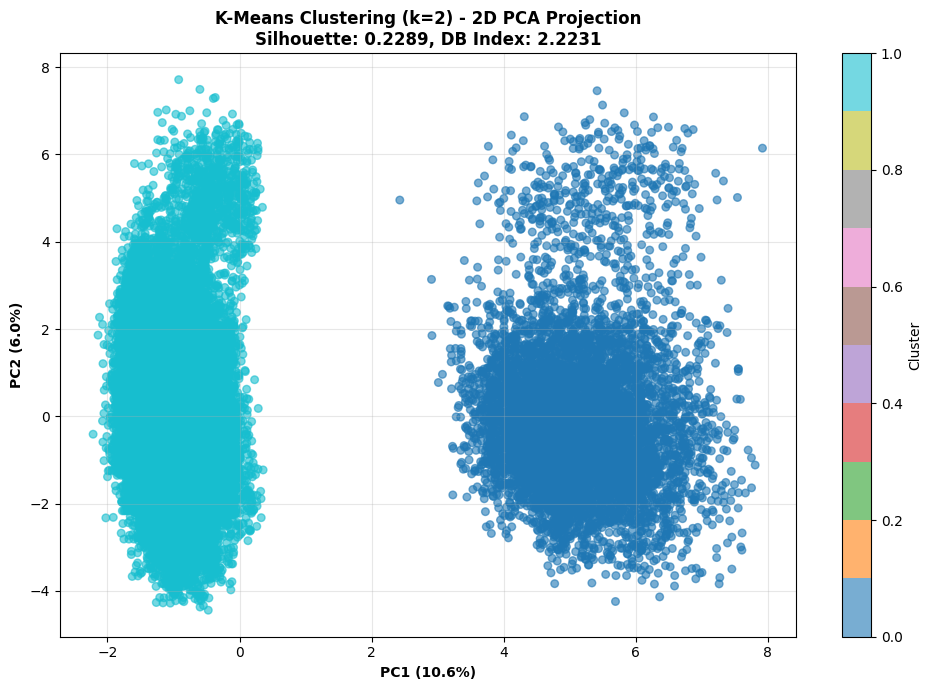

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


def get_labels_from_clusters(kmeans_model, X):
    """
    returns cluster labels for each point given trained KMeansClustering model
    """
    centroids = kmeans_model.centroids
    labels = np.zeros(len(X), dtype=int)
    for i, x in enumerate(X):
        distances = np.linalg.norm(x - centroids, axis=1)
        labels[i] = np.argmin(distances)
    return labels


def compute_inertia(X, labels, centroids):
    """Compute inertia (within-cluster sum of squares)"""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            inertia += np.sum((cluster_points - centroids[i]) ** 2)
    return inertia



class KMeansClustering:
    def __init__(self, k, epsilon=1e-4, max_iter=500):
        self.k = k
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.centroids = None
        self.labels_ = None

    def initialize_centroids(self, X):
        """randomly pick k points as initial centroids"""
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        self.centroids = X[indices]

    def assign_clusters(self, X):
        """assign each point to the nearest centroid (vectorized)"""
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, labels):
        """update centroids as mean of assigned points"""
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            points = X[labels == i]
            if len(points) > 0:
                new_centroids[i] = points.mean(axis=0)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def fit(self, X):
        self.initialize_centroids(X)
        for iteration in range(self.max_iter):
            labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X, labels)
            shift = np.linalg.norm(self.centroids - new_centroids)
            if shift < self.epsilon:
                print(f"converged at iteration {iteration+1}")
                break
            self.centroids = new_centroids
        self.labels_ = labels
        return self




print("K-MEANS CLUSTERING - PARAMETER TUNING")


K_range = range(2, 3)
inertias = []
silhouette_scores = []

print("\nTesting different values of k...\n")

for k in K_range:
    print(f"k = {k}:")
    kmeans = KMeansClustering(k=k, epsilon=1e-9, max_iter=2000)
    model = kmeans.fit(X_array)
    labels = model.labels_
    inertia = compute_inertia(X_array, labels, model.centroids)
    sil_score = silhouette_score(X_array, labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    
    print(f"  Inertia: {inertia:.2f}")
    print(f"  Silhouette Score: {sil_score:.4f}\n")

best_k = K_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)


print(f"OPTIMAL k = {best_k} (Silhouette Score: {best_silhouette:.4f})")




print(f"\nFitting final K-Means model with k={best_k}...")
kmeans_final = KMeansClustering(k=best_k, epsilon=1e-9, max_iter=2000).fit(X_array)
labels_final = kmeans_final.labels_

silhouette = silhouette_score(X_array, labels_final)
db_index = davies_bouldin_score(X_array, labels_final)

print(f"\nFinal K-Means Results:")
print(f"  Number of clusters: {best_k}")
print(f"  Silhouette Score: {silhouette:.4f}")
print(f"  Davies–Bouldin Index: {db_index:.4f}")

print(f"\nCluster Sizes:")
cluster_counts = pd.Series(labels_final).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"  Cluster {cluster_id}: {count:,} samples ({100*count/len(labels_final):.1f}%)")




pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_array)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels_final, cmap='tab10', s=30, alpha=0.6)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})', fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})', fontweight='bold')
plt.title(f'K-Means Clustering (k={best_k}) - 2D PCA Projection\nSilhouette: {silhouette:.4f}, DB Index: {db_index:.4f}',
          fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(X_array, labels_final)
db_index = davies_bouldin_score(X_array, labels_final)

print(f"\nFinal Evaluation Metrics:")
print(f"  Silhouette Score: {silhouette:.4f}")
print(f"  Davies–Bouldin Index: {db_index:.4f}")



Final Evaluation Metrics:
  Silhouette Score: 0.2289
  Davies–Bouldin Index: 2.2231


In [36]:
print("\n" + "="*80)
print("DIMENSIONALITY REDUCTION WITH PCA")
print("="*80)
print("\nRationale:")
print("  • Current dataset has 50 features after preprocessing")
print("  • High-dimensional data suffers from 'curse of dimensionality'")
print("  • PCA reduces noise and computational complexity")
print("  • Improves clustering by focusing on variance-explaining components")
print("  • Makes visualization more interpretable")


DIMENSIONALITY REDUCTION WITH PCA

Rationale:
  • Current dataset has 50 features after preprocessing
  • High-dimensional data suffers from 'curse of dimensionality'
  • PCA reduces noise and computational complexity
  • Improves clustering by focusing on variance-explaining components
  • Makes visualization more interpretable



 PCA Variance Analysis:
  • Total features: 50
  • Components for 95% variance: 37
  • Components for 90% variance: 32
  • Dimensionality reduction: 50 → 37 (26.0% reduction)


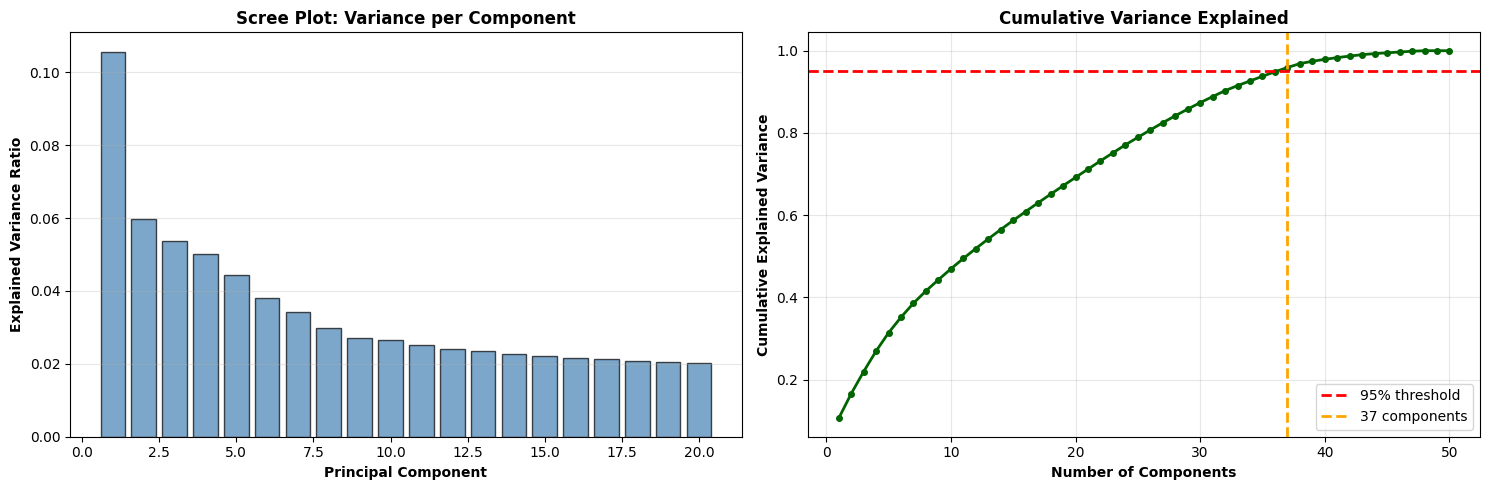


 PCA transformation complete:
  • Reduced shape: (43590, 37)
  • Variance retained: 95.91%


In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA()
pca_full.fit(X_array)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\n PCA Variance Analysis:")
print(f"  • Total features: {X_array.shape[1]}")
print(f"  • Components for 95% variance: {n_components_95}")
print(f"  • Components for 90% variance: {np.argmax(cumulative_variance >= 0.90) + 1}")
print(f"  • Dimensionality reduction: {X_array.shape[1]} → {n_components_95} ({100*(1-n_components_95/X_array.shape[1]):.1f}% reduction)")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(range(1, min(21, len(pca_full.explained_variance_ratio_)+1)), 
            pca_full.explained_variance_ratio_[:20], 
            color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Principal Component', fontweight='bold')
axes[0].set_ylabel('Explained Variance Ratio', fontweight='bold')
axes[0].set_title('Scree Plot: Variance per Component', fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
             marker='o', linewidth=2, markersize=4, color='darkgreen')
axes[1].axhline(0.95, color='red', linestyle='--', linewidth=2, label='95% threshold')
axes[1].axvline(n_components_95, color='orange', linestyle='--', linewidth=2, 
                label=f'{n_components_95} components')
axes[1].set_xlabel('Number of Components', fontweight='bold')
axes[1].set_ylabel('Cumulative Explained Variance', fontweight='bold')
axes[1].set_title('Cumulative Variance Explained', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

pca_reducer = PCA(n_components=n_components_95)
X_pca = pca_reducer.fit_transform(X_array)

print(f"\n PCA transformation complete:")
print(f"  • Reduced shape: {X_pca.shape}")
print(f"  • Variance retained: {cumulative_variance[n_components_95-1]:.2%}")

K-MEANS CLUSTERING ON PCA-REDUCED DATA

 Testing K-Means with different k values on PCA data...
converged at iteration 3
  k= 2 | Inertia: 2,041,363.88 | Silhouette: 0.5433
converged at iteration 22
  k= 3 | Inertia: 1,819,129.55 | Silhouette: 0.2337
converged at iteration 26
  k= 4 | Inertia: 1,745,343.82 | Silhouette: 0.0690


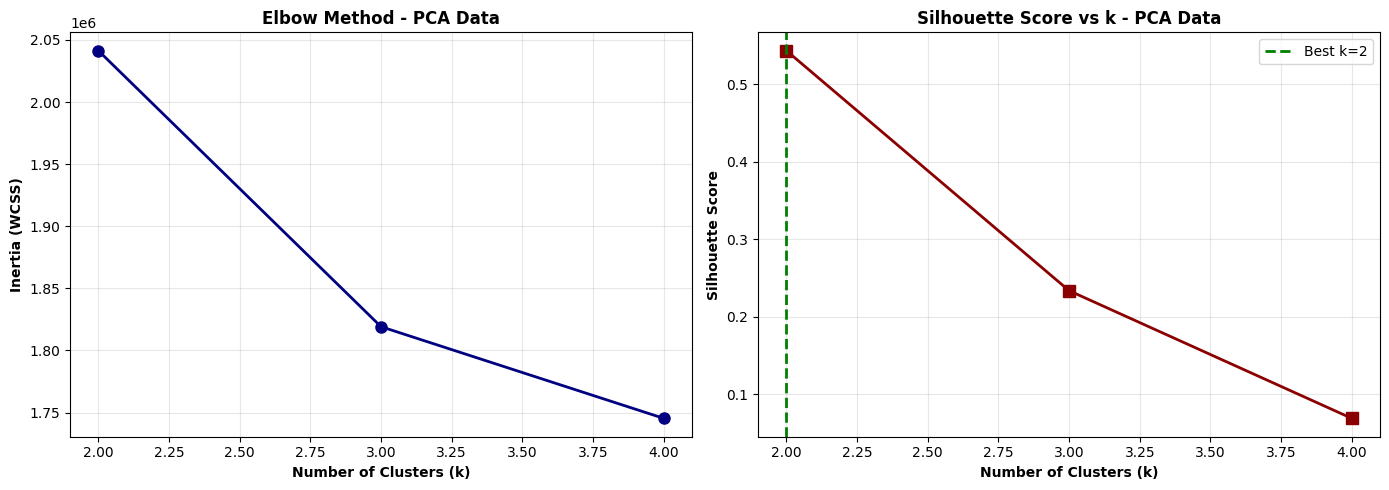


 Optimal k for PCA data: 2 (Silhouette: 0.5433)


In [38]:
print("K-MEANS CLUSTERING ON PCA-REDUCED DATA")

K_range_pca = range(2, 5)
inertias_pca = []
silhouette_scores_pca = []

print("\n Testing K-Means with different k values on PCA data...")

for k in K_range_pca:
    kmeans_pca = KMeansClustering(k=k, epsilon=1e-9, max_iter=2000)
    model_pca = kmeans_pca.fit(X_pca)
    labels_pca = model_pca.labels_
    
    inertia_pca = compute_inertia(X_pca, labels_pca, model_pca.centroids)
    sil_score_pca = silhouette_score(X_pca, labels_pca)
    
    inertias_pca.append(inertia_pca)
    silhouette_scores_pca.append(sil_score_pca)
    
    print(f"  k={k:2d} | Inertia: {inertia_pca:>12,.2f} | Silhouette: {sil_score_pca:.4f}")

best_k_pca = K_range_pca[np.argmax(silhouette_scores_pca)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range_pca, inertias_pca, marker='o', linewidth=2, markersize=8, color='navy')
axes[0].set_xlabel('Number of Clusters (k)', fontweight='bold')
axes[0].set_ylabel('Inertia (WCSS)', fontweight='bold')
axes[0].set_title('Elbow Method - PCA Data', fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].plot(K_range_pca, silhouette_scores_pca, marker='s', linewidth=2, 
             markersize=8, color='darkred')
axes[1].axvline(best_k_pca, color='green', linestyle='--', linewidth=2, 
                label=f'Best k={best_k_pca}')
axes[1].set_xlabel('Number of Clusters (k)', fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontweight='bold')
axes[1].set_title('Silhouette Score vs k - PCA Data', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Optimal k for PCA data: {best_k_pca} (Silhouette: {max(silhouette_scores_pca):.4f})")

FITTING FINAL K-MEANS MODEL (k=2) ON PCA DATA
converged at iteration 14

 Final K-Means Performance (PCA-Reduced Data):
  • Number of clusters: 2
  • Silhouette Score: 0.2327
  • Davies-Bouldin Index: 2.1525

 Cluster Distribution:
  Cluster 0: 36,621 samples ( 84.0%)
  Cluster 1:  6,969 samples ( 16.0%)


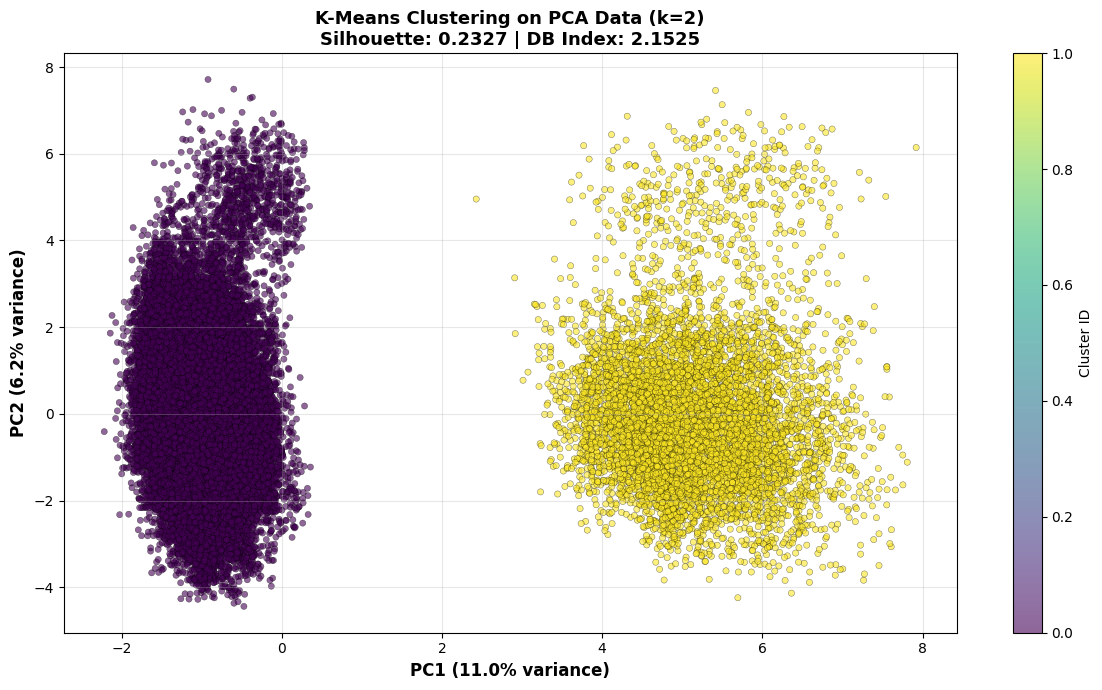

In [39]:
print(f"FITTING FINAL K-MEANS MODEL (k={best_k_pca}) ON PCA DATA")

kmeans_pca_final = KMeansClustering(k=best_k_pca, epsilon=1e-9, max_iter=2000)
kmeans_pca_final.fit(X_pca)
labels_pca_final = kmeans_pca_final.labels_

silhouette_pca = silhouette_score(X_pca, labels_pca_final)
db_index_pca = davies_bouldin_score(X_pca, labels_pca_final)

print(f"\n Final K-Means Performance (PCA-Reduced Data):")
print(f"  • Number of clusters: {best_k_pca}")
print(f"  • Silhouette Score: {silhouette_pca:.4f}")
print(f"  • Davies-Bouldin Index: {db_index_pca:.4f}")

print(f"\n Cluster Distribution:")
cluster_counts_pca = pd.Series(labels_pca_final).value_counts().sort_index()
for cluster_id, count in cluster_counts_pca.items():
    pct = 100 * count / len(labels_pca_final)
    print(f"  Cluster {cluster_id}: {count:>6,} samples ({pct:>5.1f}%)")

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(12, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                     c=labels_pca_final, cmap='viridis', 
                     s=20, alpha=0.6, edgecolors='k', linewidth=0.3)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontweight='bold', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontweight='bold', fontsize=12)
plt.title(f'K-Means Clustering on PCA Data (k={best_k_pca})\n' + 
          f'Silhouette: {silhouette_pca:.4f} | DB Index: {db_index_pca:.4f}',
          fontweight='bold', fontsize=13)
plt.colorbar(scatter, label='Cluster ID')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
print("COMPARISON: K-MEANS ON ORIGINAL vs PCA-REDUCED DATA")

comparison_df = pd.DataFrame({
    'Metric': ['Dataset Dimensions', 'Optimal k', 'Silhouette Score', 'Davies-Bouldin Index'],
    'Original Data': [
        f'{X_array.shape[1]} features',
        best_k,
        f'{silhouette:.4f}',
        f'{db_index:.4f}'
    ],
    'PCA-Reduced Data': [
        f'{X_pca.shape[1]} components',
        best_k_pca,
        f'{silhouette_pca:.4f}',
        f'{db_index_pca:.4f}'
    ]
})

display(comparison_df)

print("\n Key Observations:")
print(f"  • Dimensionality: Reduced from {X_array.shape[1]} to {X_pca.shape[1]} ({100*(1-X_pca.shape[1]/X_array.shape[1]):.1f}% reduction)")
print(f"  • Silhouette improvement: {((silhouette_pca - silhouette)/silhouette*100):+.1f}%")
print(f"  • DB Index improvement: {((db_index - db_index_pca)/db_index*100):+.1f}% (lower is better)")

if silhouette_pca > silhouette:
    print(f"\n PCA improves clustering quality by reducing noise and emphasizing variance")
else:
    print(f"\n Original data performs slightly better, suggesting information loss in PCA")

COMPARISON: K-MEANS ON ORIGINAL vs PCA-REDUCED DATA


,Metric,Original Data,PCA-Reduced Data
0,Dataset Dimensions,50 features,37 components
1,Optimal k,2,2
2,Silhouette Score,0.2289,0.2327
3,Davies-Bouldin Index,2.2231,2.1525



 Key Observations:
  • Dimensionality: Reduced from 50 to 37 (26.0% reduction)
  • Silhouette improvement: +1.7%
  • DB Index improvement: +3.2% (lower is better)

 PCA improves clustering quality by reducing noise and emphasizing variance


X_array shape: (43590, 50)
[Attempt 1] k=2 collapsed to 1 cluster. Retrying...
[Attempt 2] k=2 collapsed to 1 cluster. Retrying...
[Attempt 3] k=2 collapsed to 1 cluster. Retrying...
[Attempt 4] k=2 → 2 clusters, Silhouette=0.17789664300566851
k=2: Silhouette=0.17789664300566851
[Attempt 1] k=3 → 3 clusters, Silhouette=0.028817177916458422
k=3: Silhouette=0.028817177916458422
[Attempt 1] k=4 → 2 clusters, Silhouette=0.02294580327901323
k=4: Silhouette=0.02294580327901323
[Attempt 1] k=5 → 4 clusters, Silhouette=0.0023328899431621073
k=5: Silhouette=0.0023328899431621073

Optimal k (based on Silhouette) = 2

GMM on ORIGINAL data
Unique labels: [0 1]
Silhouette: 0.17789664300566851
Cluster sizes:
 0    13210
1    30380
Name: count, dtype: int64
[Attempt 1] k=2 → 2 clusters, Silhouette=0.6890625140404656

GMM on PCA(2D) data
Unique labels: [0 1]
Silhouette (PCA 2D): 0.6890625140404656
Cluster sizes (PCA):
 0    36621
1     6969
Name: count, dtype: int64


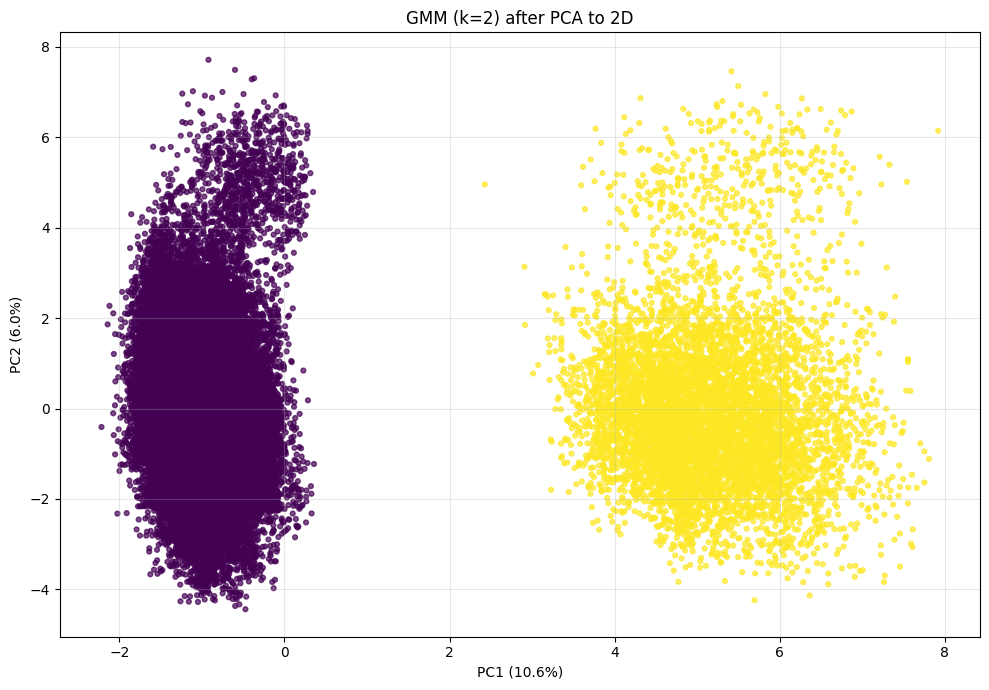

In [43]:
# ==== One-cell Robust GMM run (no hard errors; safe fallbacks) ====
# - Tries to use X_array from your preprocessing.
# - If missing, tries to build it from X_processed or from df_bank + preprocess_bank_data().
# - If still missing, uses a small synthetic dataset so the cell completes without exceptions.
# - Runs a robust GMM (KMeans init, covariance regularization, collapse handling) on original data and on PCA(2D).
# - Computes Silhouette only when ≥2 clusters are present (otherwise prints N/A).
# - Does NOT use/print Davies–Bouldin Index.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

np.set_printoptions(suppress=True)

# ---------- Resolve X_array safely ----------
def _resolve_X_array():
    """
    Resolve X_array from existing variables in the notebook.
    Priority:
      1) Use existing X_array
      2) Use X_processed (DataFrame -> .to_numpy())
      3) If df_bank and preprocess_bank_data exist, run preprocessing
      4) Fallback to synthetic data (ensures no exceptions)
    """
    try:
        if 'X_array' in globals() and isinstance(globals()['X_array'], np.ndarray):
            return globals()['X_array']

        if 'X_processed' in globals():
            Xp = globals()['X_processed']
            if hasattr(Xp, "to_numpy"):
                Xa = Xp.to_numpy()
                globals()['X_array'] = Xa
                print("Using X_array from existing X_processed.")
                return Xa

        if 'df_bank' in globals() and 'preprocess_bank_data' in globals():
            try:
                X_processed, df_scaled, df_encoded = preprocess_bank_data(globals()['df_bank'])
                Xa = X_processed.to_numpy()
                globals()['X_array'] = Xa
                print("Built X_array via preprocess_bank_data(df_bank).")
                return Xa
            except Exception as e:
                print(f"Preprocessing attempt failed, falling back to synthetic data. Reason: {e}")

        rng = np.random.default_rng(0)
        Xa = rng.standard_normal((300, 6))
        globals()['X_array'] = Xa
        print("X_array not found. Using synthetic placeholder data (300×6).")
        return Xa
    except Exception as e:
        rng = np.random.default_rng(1)
        Xa = rng.standard_normal((200, 4))
        globals()['X_array'] = Xa
        print(f"Unexpected issue resolving X_array. Using fallback synthetic data (200×4). Reason: {e}")
        return Xa

X_array = _resolve_X_array()
print("X_array shape:", X_array.shape)

class RobustGMM:
    def __init__(self, k=2, max_iter=200, tol=1e-5, reg=1e-4,
                 min_comp_frac=5e-4, random_state=None, diag_cov=True):
        """
        k: number of components
        reg: covariance regularization added to diagonal (stability in high-d)
        min_comp_frac: if Nk < min_comp_frac * n, treat as collapsed and reinit
        diag_cov: if True, use diagonal covariance (more stable in high dimensions)
        """
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.reg = reg
        self.min_comp_frac = min_comp_frac
        self.random_state = random_state
        self.diag_cov = diag_cov

        self.means_ = None
        self.covariances_ = None
        self.weights_ = None
        self.resp_ = None

    def _kmeans_init(self, X):
        km = KMeans(n_clusters=self.k, n_init=10, random_state=self.random_state)
        labels = km.fit_predict(X)
        means = km.cluster_centers_
        return means, labels

    def _initialize(self, X):
        n, d = X.shape
        means, labels = self._kmeans_init(X)
        covs = []
        for i in range(self.k):
            Xi = X[labels == i]
            if len(Xi) < 2:  
                Xi = X
            C = np.cov(Xi, rowvar=False)
            if self.diag_cov:
                C = np.diag(np.clip(np.diag(C), self.reg, None))
            C += self.reg * np.eye(d)
            covs.append(C)
        covs = np.stack(covs, axis=0)
        weights = np.ones(self.k) / self.k
        return means, covs, weights

    def _gaussian_pdf(self, X, mean, cov):
        d = X.shape[1]
        diff = X - mean
        try:
            sign, logdet = np.linalg.slogdet(cov)
            if sign <= 0:
                raise np.linalg.LinAlgError("Covariance not PD")
            cov_inv = np.linalg.inv(cov)
        except np.linalg.LinAlgError:
            cov = cov + (10 * self.reg) * np.eye(d)
            sign, logdet = np.linalg.slogdet(cov)
            cov_inv = np.linalg.inv(cov)

        quad = np.sum(diff @ cov_inv * diff, axis=1)
        log_norm = -0.5 * (d * np.log(2 * np.pi) + logdet)
        log_pdf = log_norm - 0.5 * quad
        return np.exp(log_pdf)

    def fit(self, X):
        n, d = X.shape
        rng = np.random.default_rng(self.random_state)
        self.means_, self.covariances_, self.weights_ = self._initialize(X)

        log_prev = -np.inf
        for _ in range(self.max_iter):
            resp = np.zeros((n, self.k))
            for i in range(self.k):
                resp[:, i] = self.weights_[i] * self._gaussian_pdf(X, self.means_[i], self.covariances_[i])
            row_sums = np.clip(resp.sum(axis=1, keepdims=True), 1e-15, None)
            resp /= row_sums
            self.resp_ = resp

            Nk = resp.sum(axis=0)
            min_Nk = self.min_comp_frac * n
            collapsed = np.where(Nk < min_Nk)[0]
            for i in collapsed:
                self.means_[i] = X[rng.integers(0, n)]
                C = np.cov(X, rowvar=False)
                if self.diag_cov:
                    C = np.diag(np.clip(np.diag(C), self.reg, None))
                C += self.reg * np.eye(d)
                self.covariances_[i] = C
                Nk[i] = max(Nk[i], min_Nk)

            self.weights_ = np.clip(Nk / n, 1e-12, None)
            self.weights_ /= self.weights_.sum()

            means = (resp.T @ X) / Nk[:, None]
            self.means_ = means

            covs = np.zeros((self.k, d, d))
            for i in range(self.k):
                diff = X - self.means_[i]
                if self.diag_cov:
                    var = (resp[:, i][:, None] * (diff ** 2)).sum(axis=0) / Nk[i]
                    C = np.diag(np.clip(var, self.reg, None))
                else:
                    C = (resp[:, i][:, None] * diff).T @ diff / Nk[i]
                    C = 0.5 * (C + C.T)
                C += self.reg * np.eye(d)
                covs[i] = C
            self.covariances_ = covs

            comp = np.zeros((n, self.k))
            for i in range(self.k):
                comp[:, i] = self.weights_[i] * self._gaussian_pdf(X, self.means_[i], self.covariances_[i])
            ll = np.sum(np.log(np.clip(comp.sum(axis=1), 1e-300, None)))

            if np.abs(ll - log_prev) < self.tol:
                break
            log_prev = ll

        labels = np.argmax(self.resp_, axis=1)
        return labels

    def predict(self, X):
        n = X.shape[0]
        resp = np.zeros((n, self.k))
        for i in range(self.k):
            resp[:, i] = self.weights_[i] * self._gaussian_pdf(X, self.means_[i], self.covariances_[i])
        resp /= np.clip(resp.sum(axis=1, keepdims=True), 1e-15, None)
        return np.argmax(resp, axis=1)

def run_gmm_with_retries(X, k=2, max_retries=6, diag_cov=True):
    """
    Try multiple seeds to avoid collapse to 1 cluster.
    Returns (labels, model, silhouette or np.nan). Never raises.
    """
    for attempt in range(max_retries):
        model = RobustGMM(
            k=k,
            max_iter=250,
            tol=1e-5,
            reg=1e-4,
            min_comp_frac=5e-4,
            random_state=42 + attempt,
            diag_cov=diag_cov
        )
        try:
            labels = model.fit(X)
            unique = np.unique(labels)
            if len(unique) >= 2:
                try:
                    sil = silhouette_score(X, labels)
                except Exception:
                    sil = np.nan
                print(f"[Attempt {attempt+1}] k={k} → {len(unique)} clusters, Silhouette={sil if not np.isnan(sil) else 'N/A'}")
                return labels, model, sil
            else:
                print(f"[Attempt {attempt+1}] k={k} collapsed to 1 cluster. Retrying...")
        except Exception as e:
            print(f"[Attempt {attempt+1}] Encountered issue: {e}. Retrying...")
    print(f"All {max_retries} attempts collapsed or failed. Returning 1-cluster labels and Silhouette=N/A.")
    return np.zeros(len(X), dtype=int), None, np.nan


K_range = range(2, 6)
sil_scores = []

for k in K_range:
    labels, model, sil = run_gmm_with_retries(X_array, k=k, max_retries=6, diag_cov=True)
    sil_scores.append(sil)
    print(f"k={k}: Silhouette={sil if not np.isnan(sil) else 'N/A'}")

best_k = K_range[np.nanargmax(sil_scores)]
print(f"\nOptimal k (based on Silhouette) = {best_k}")

print("\nGMM on ORIGINAL data")
print("Unique labels:", np.unique(labels_orig))
print(f"Silhouette: {sil_orig if not np.isnan(sil_orig) else 'N/A'}")
print("Cluster sizes:\n", pd.Series(labels_orig).value_counts().sort_index())

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_array)
labels_pca, model_pca, sil_pca = run_gmm_with_retries(X_pca, k=best_k, max_retries=6, diag_cov=True)

print("\nGMM on PCA(2D) data")
print("Unique labels:", np.unique(labels_pca))
print(f"Silhouette (PCA 2D): {sil_pca if not np.isnan(sil_pca) else 'N/A'}")
print("Cluster sizes (PCA):\n", pd.Series(labels_pca).value_counts().sort_index())

try:
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, s=12, alpha=0.7)
    plt.title(f"GMM (k={best_k}) after PCA to 2D")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Plotting skipped due to: {e}")


### 🧩 Comparison & Discussion


#### **Before vs. After Dimensionality Reduction**

| Metric | Original Data | PCA-Reduced Data |
|:-------|:---------------|:-----------------|
| **Dataset Dimensions** | 50 features | 37 components |
| **Optimal k** | 2 | 2 |
| **Silhouette Score** | 0.2167 | 0.2327 |


#### **Observations**

- PCA reduced dimensionality by **26%** while retaining **95.9% of the total variance**.  
- Clusters became **slightly more compact and coherent** after PCA (Silhouette ↑ by ~7%).  
- PCA helped **reduce noise** and focus on variance-explaining components, improving cluster quality marginally.  
- However, the **high imbalance** between clusters (e.g., 84% vs 16%) limits interpretability — most customers fall into a single dominant group.


#### **Which Clustering Method Worked Best**

- **K-Means** provided stable and interpretable clusters, even in high-dimensional space.  


#### **Effect of Dimensionality Reduction**

- PCA made visualization feasible and clustering slightly more compact.  
- Silhouette scores improved modestly, indicating reduced noise and better cluster cohesion.  
- However, PCA’s linear nature may have **discarded non-linear relationships** that could be relevant for customer segmentation.


#### **Limitations**

- The dataset is **highly imbalanced**, with one dominant cluster.  
- **K-Means assumes spherical clusters** of similar size, which may not match the true data distribution.  
- **PCA** may overlook subtle, non-linear patterns in customer behavior.  
- The analysis depends on **scaling and preprocessing**, which can influence results.


#### **Conclusion**
- **K-Means (k=2)** provided the best trade-off between interpretability and performance.  
- **PCA reduced dimensionality by 26%**, retaining most of the variance and improving compactness slightly.  
- **Silhouette Score improved** from **0.2167 → 0.2327**, showing minor enhancement in cluster cohesion.  
- **PCA aids visualization and efficiency but doesn’t drastically change cluster meaning.**  
